In [122]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.morphology import skeletonize

In [149]:
def display_image(image, title="image", subplot=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if subplot:
        plt.subplot(subplot)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

In [158]:
vid = cv2.VideoCapture('capillary.mp4')

In [159]:
vid

< cv2.VideoCapture 0x33cbf3bf0>

In [160]:
ret, img = vid.read()

In [161]:
imgBlur = cv2.GaussianBlur(img, (21,21), 0)
ret, imgth = cv2.threshold(imgBlur, 150, 255, cv2.THRESH_BINARY)

In [162]:
red_img = channel_mix(img)
_, binary_image = cv2.threshold(red_img, 2, 255, cv2.THRESH_BINARY)

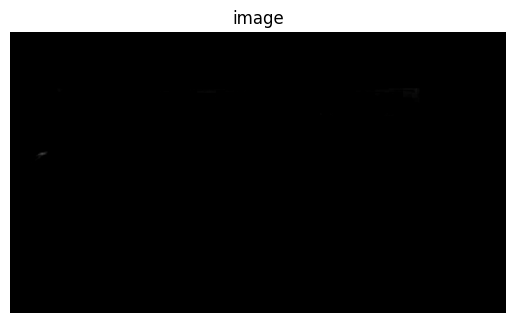

In [163]:
display_image(red_img)

In [164]:
def channel_mix(img):

    b,g,r = cv2.split(img)
    c1 = -0.5
    c2 = -1
    c3 = 1.3
    
    isolated = c1 * g + c2 * b + c3 * r    
    isolated = np.clip(isolated, 0, 255)    
    isolated = isolated.astype(img.dtype)

    return isolated

In [165]:
noise = 350
s = []

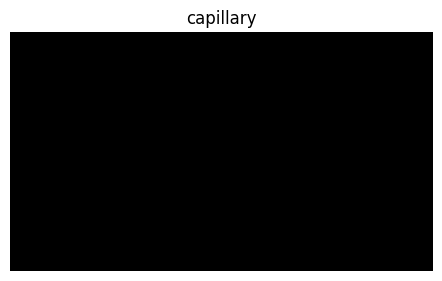

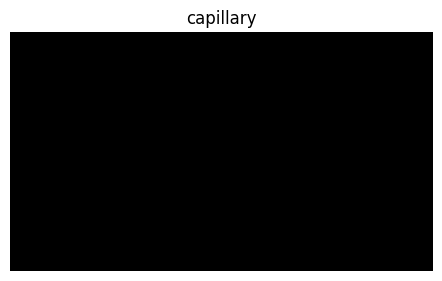

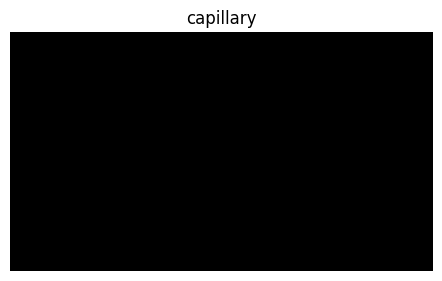

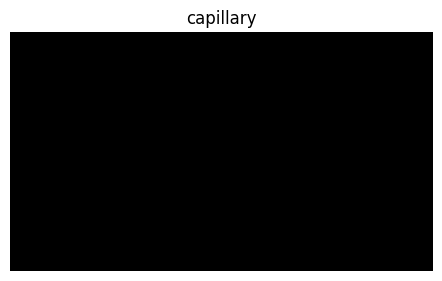

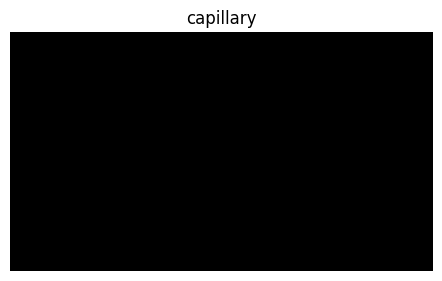

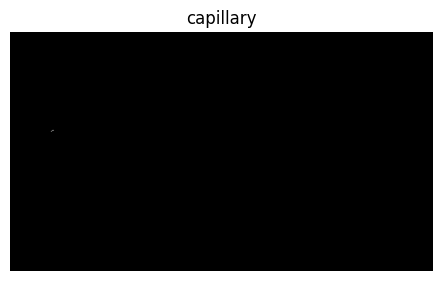

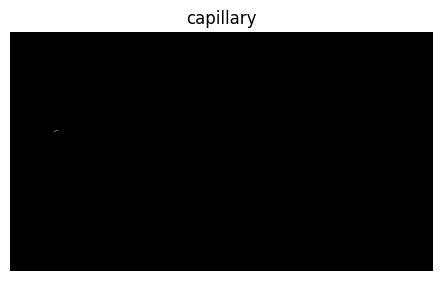

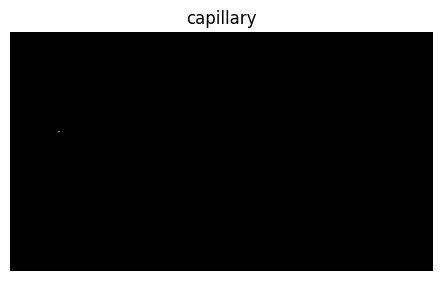

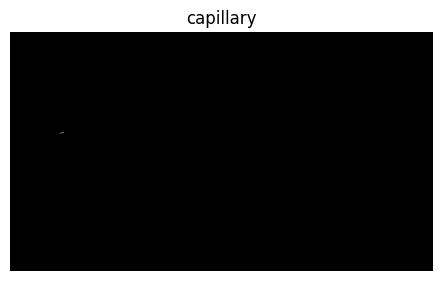

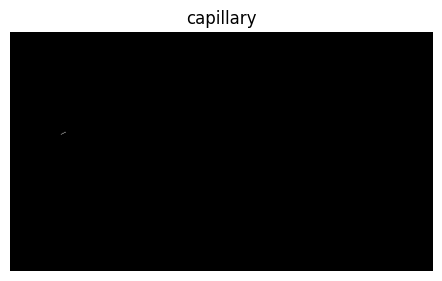

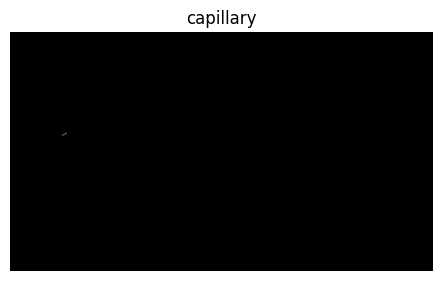

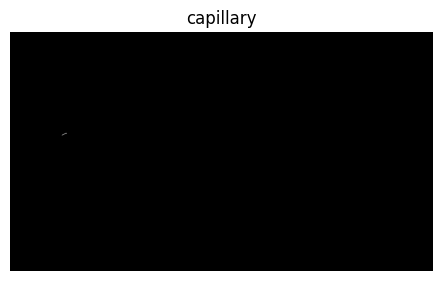

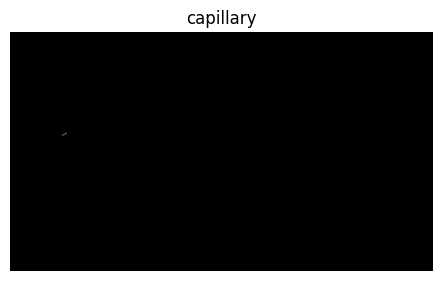

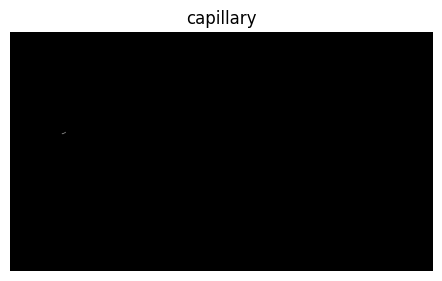

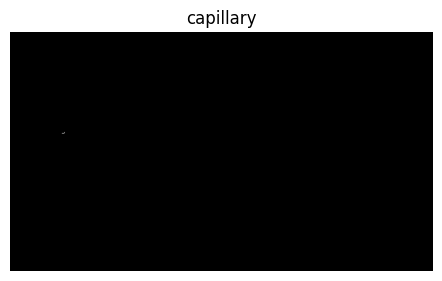

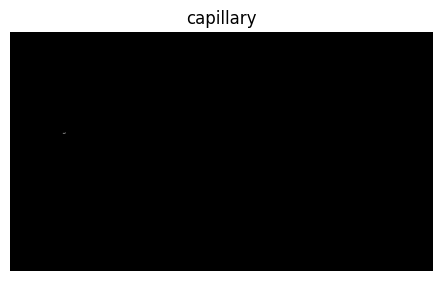

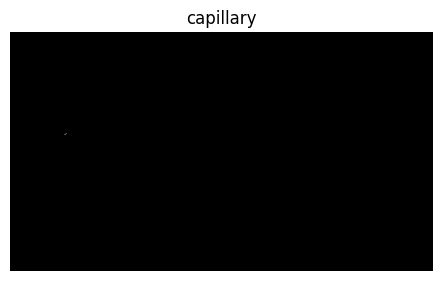

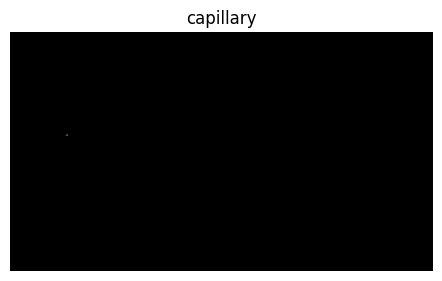

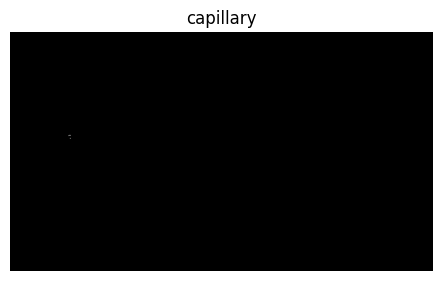

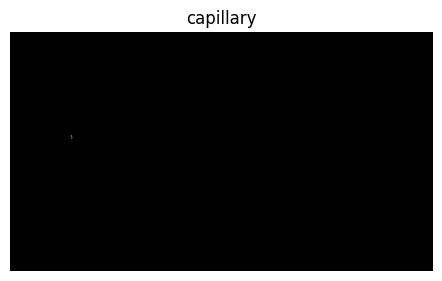

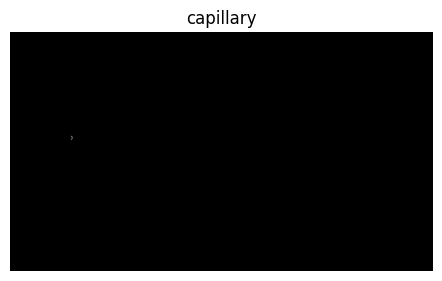

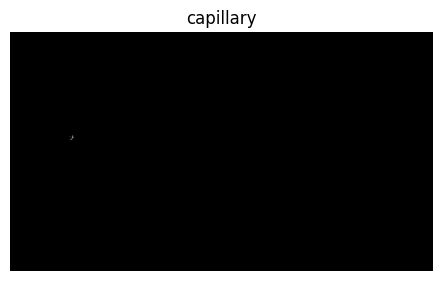

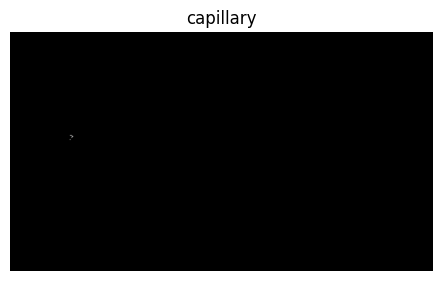

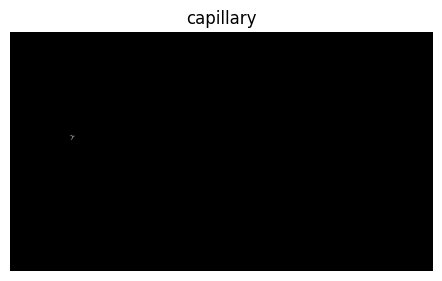

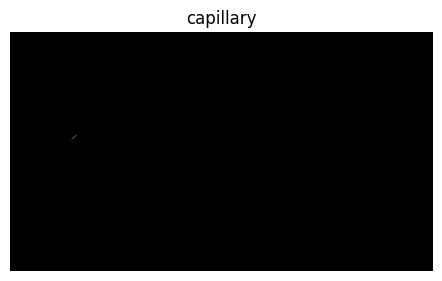

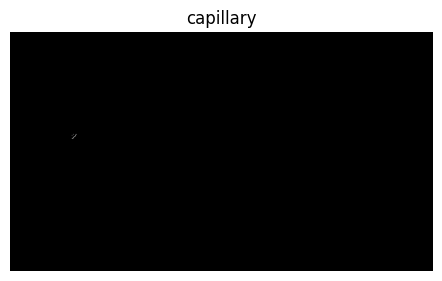

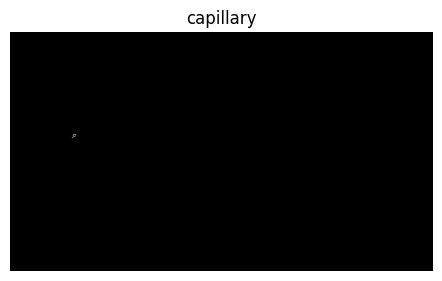

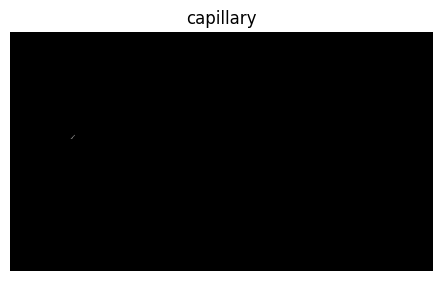

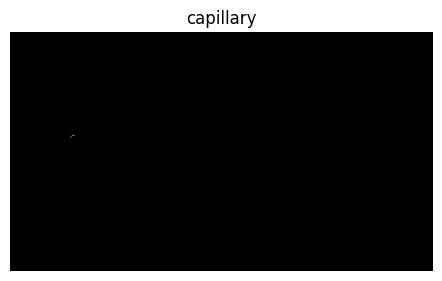

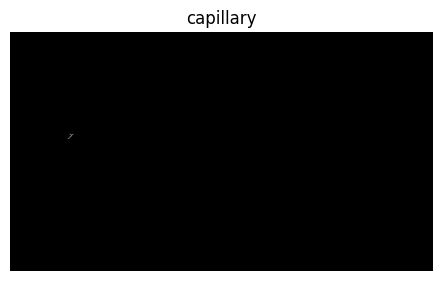

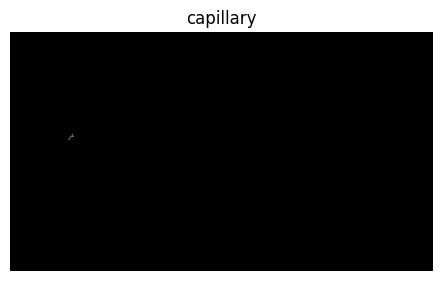

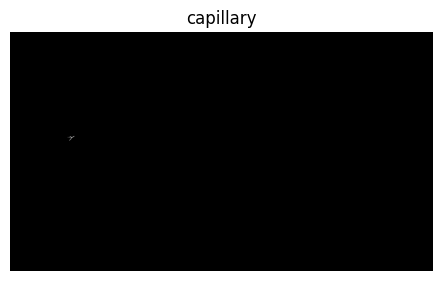

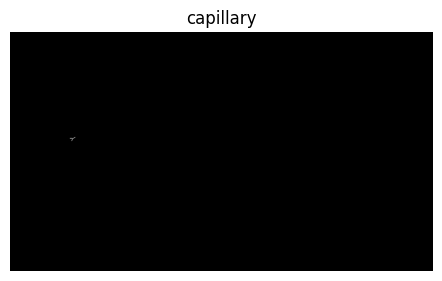

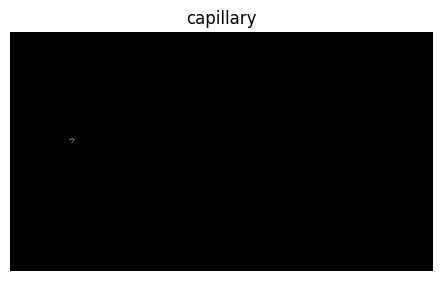

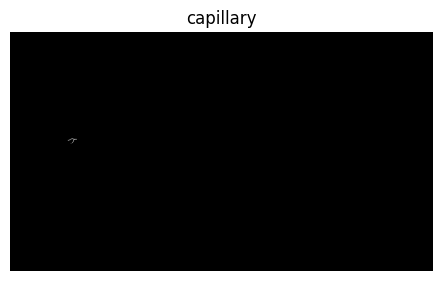

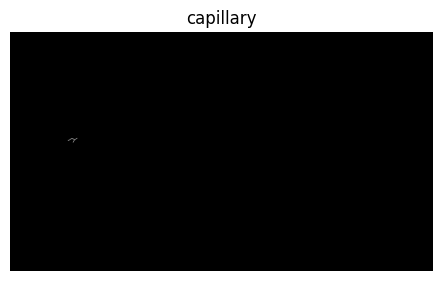

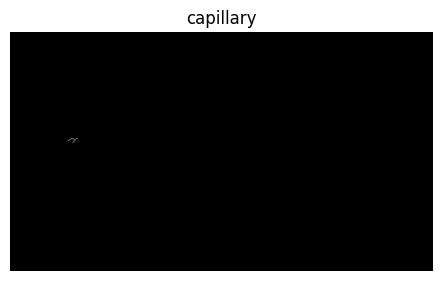

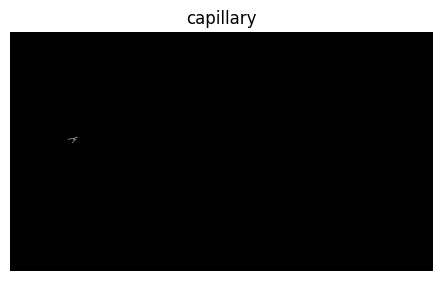

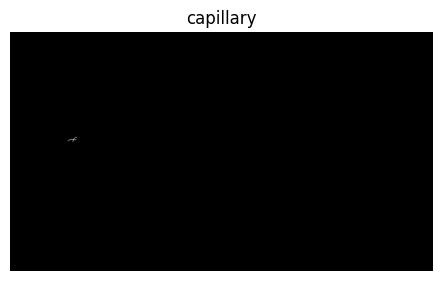

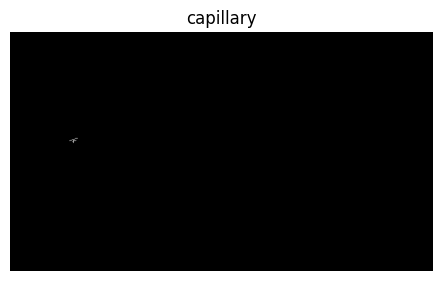

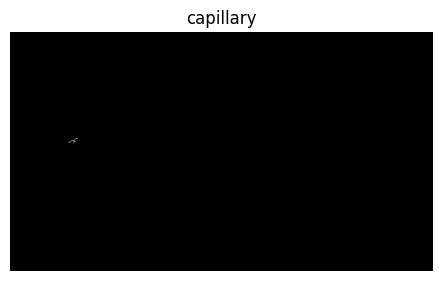

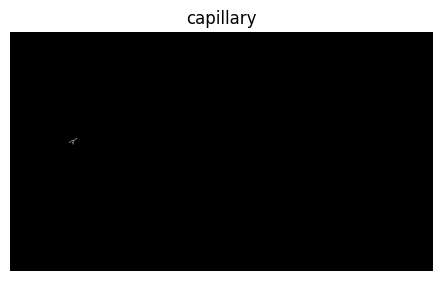

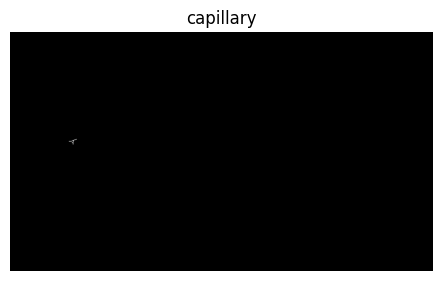

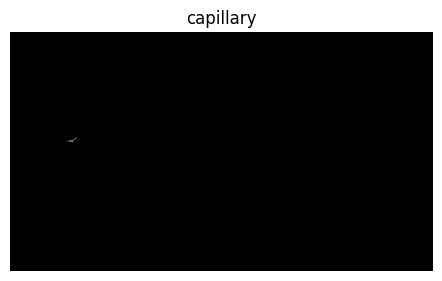

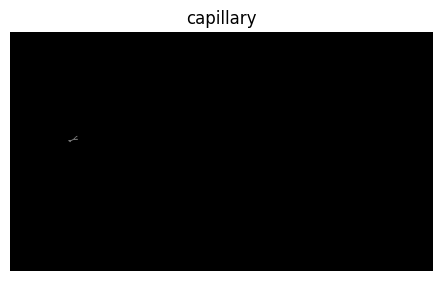

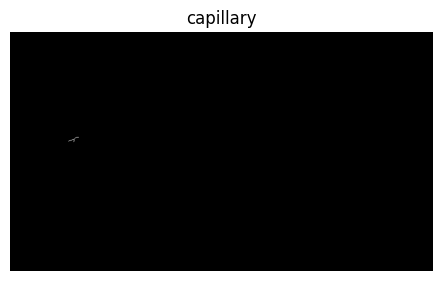

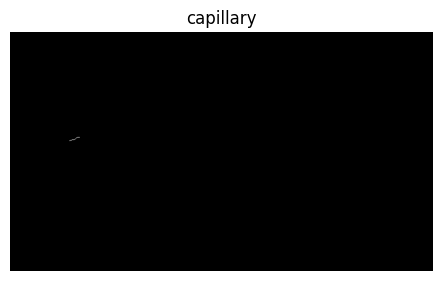

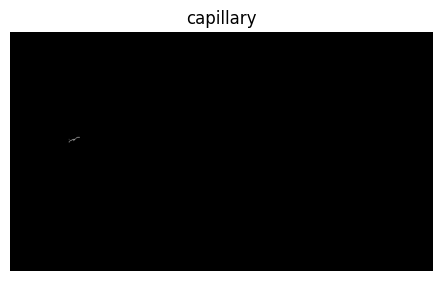

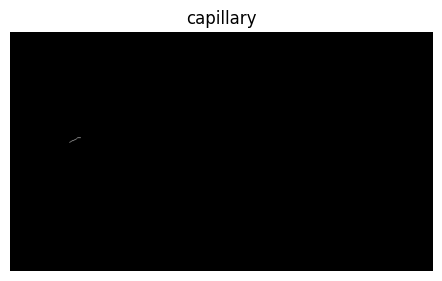

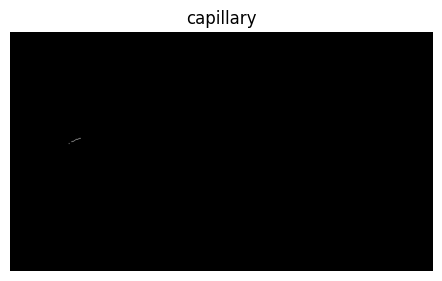

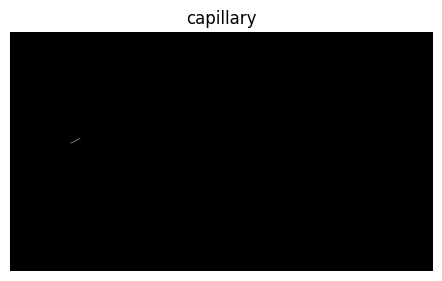

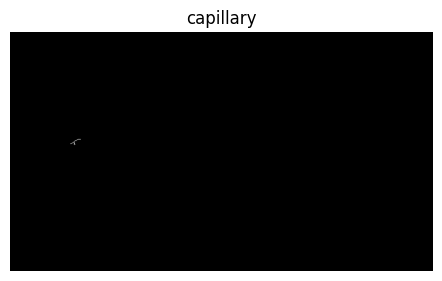

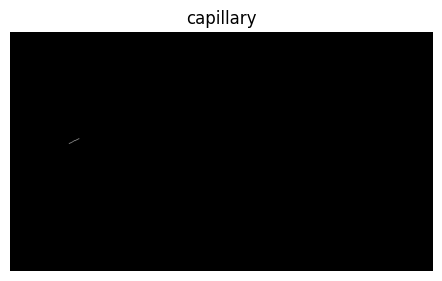

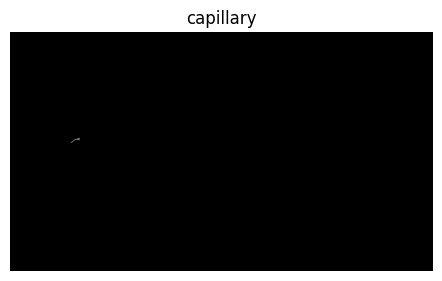

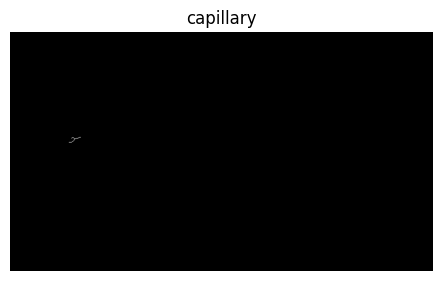

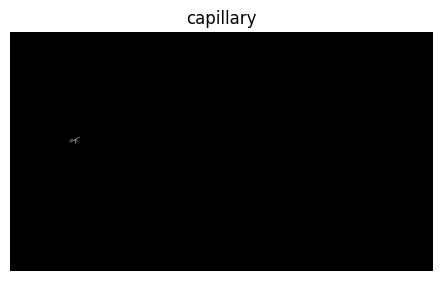

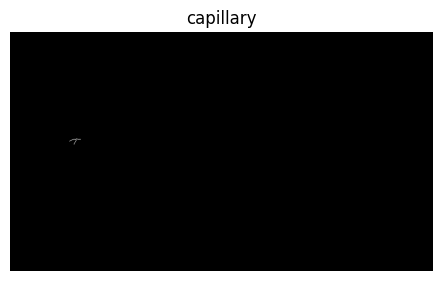

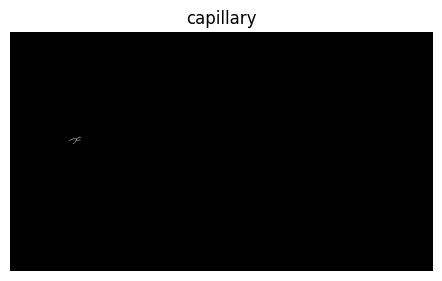

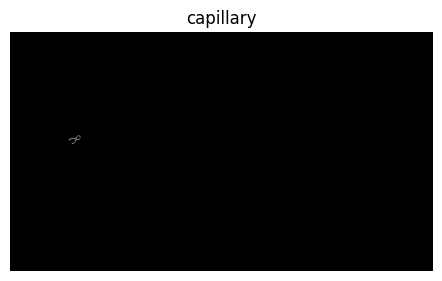

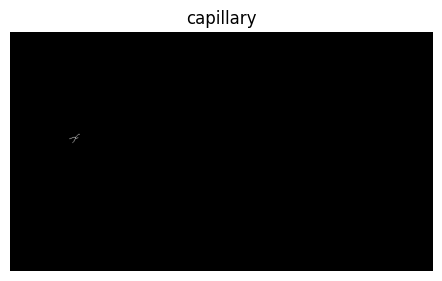

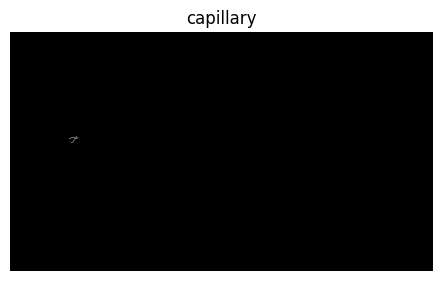

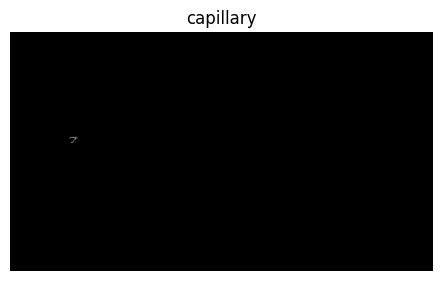

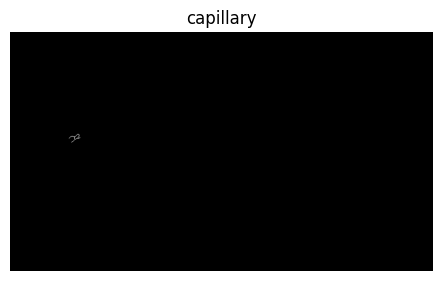

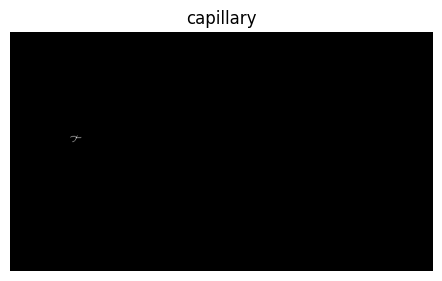

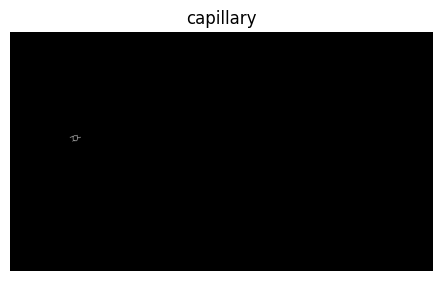

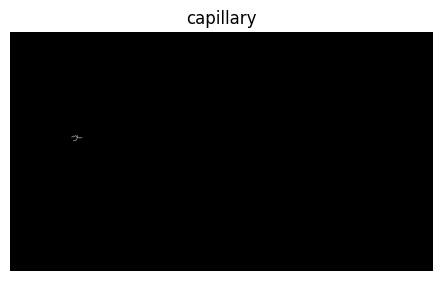

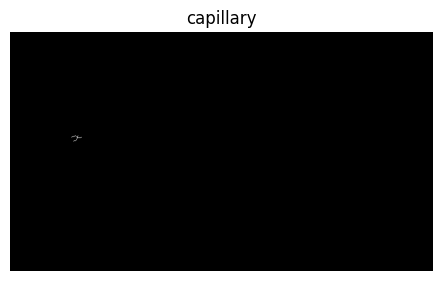

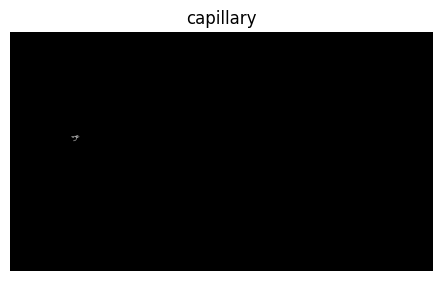

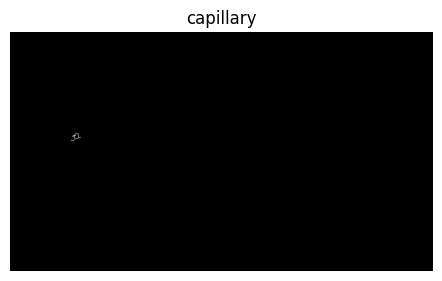

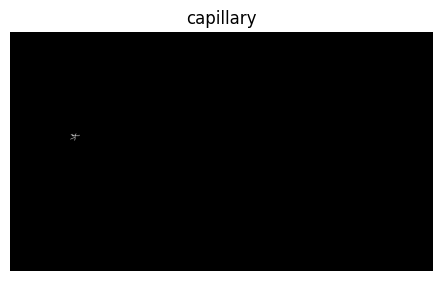

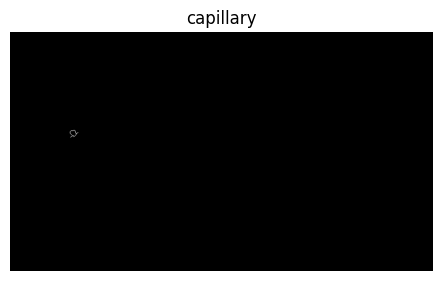

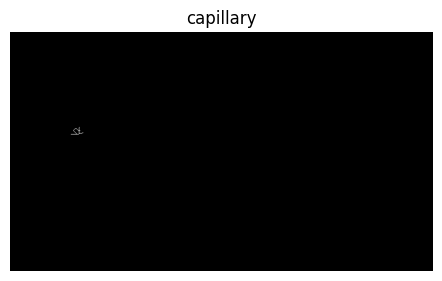

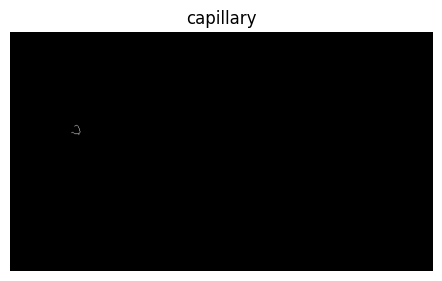

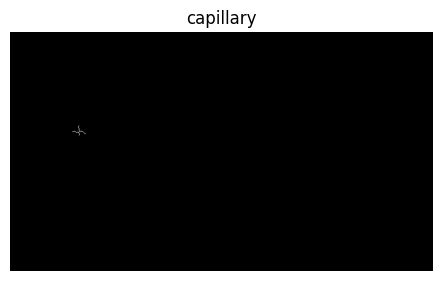

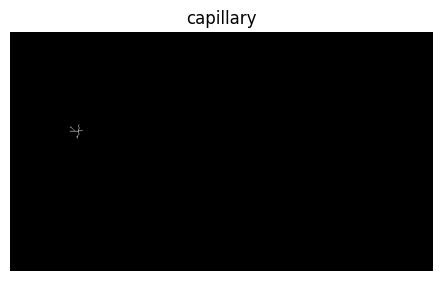

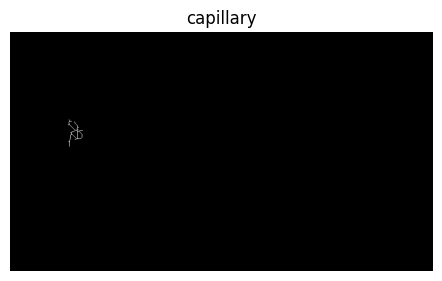

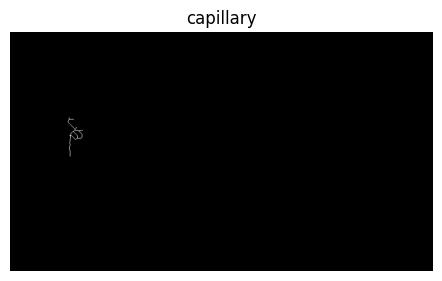

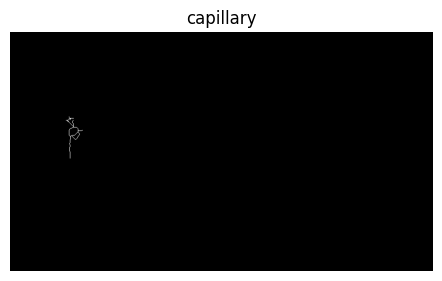

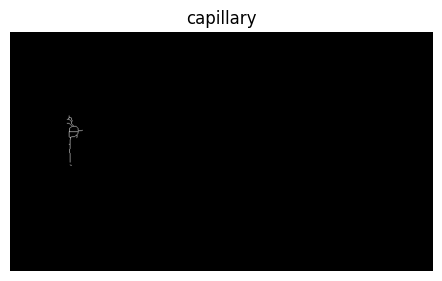

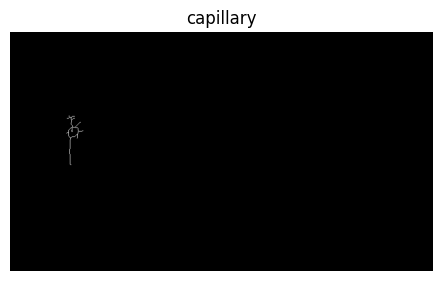

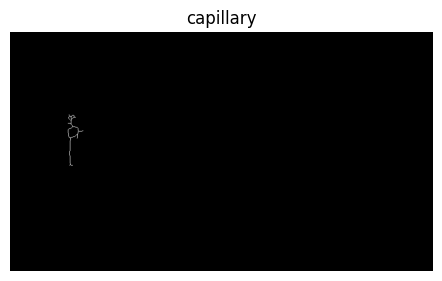

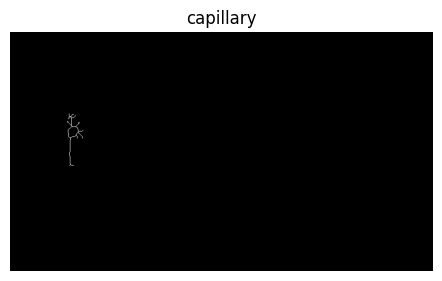

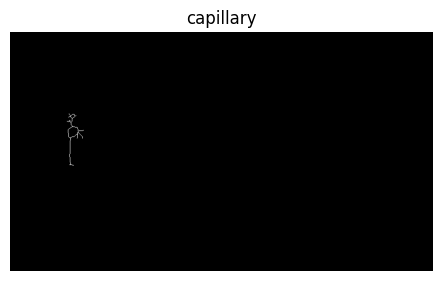

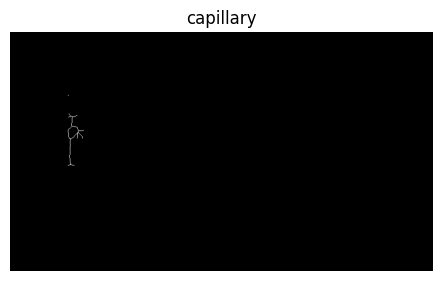

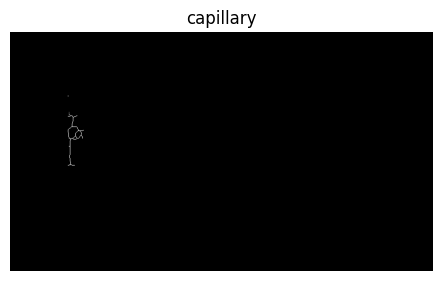

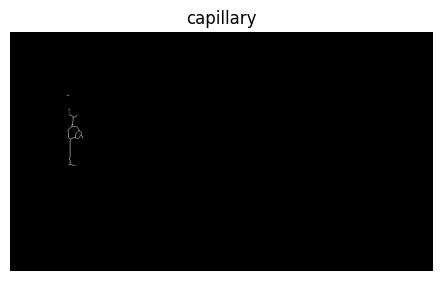

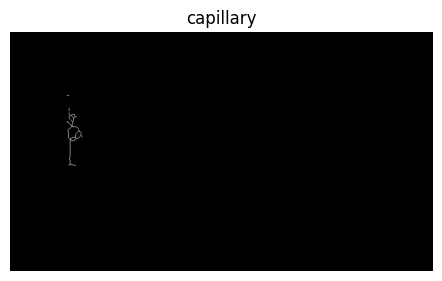

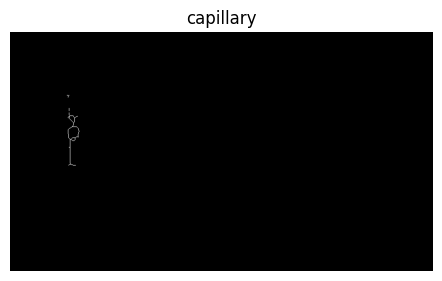

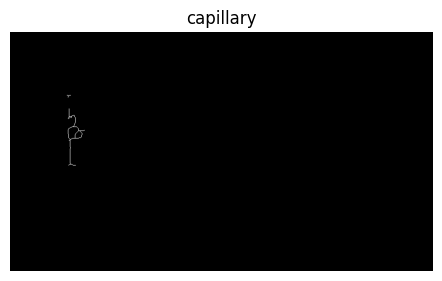

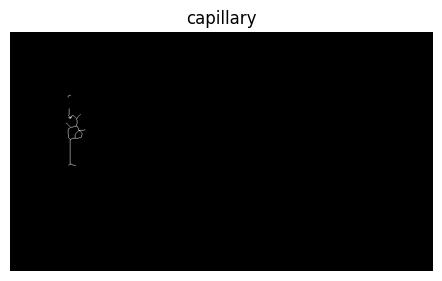

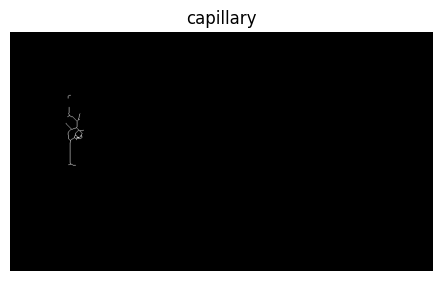

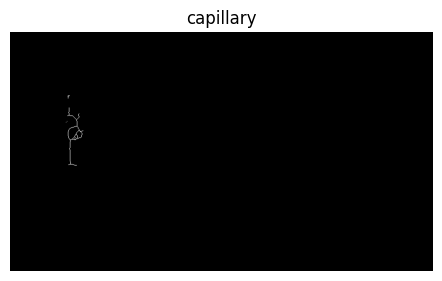

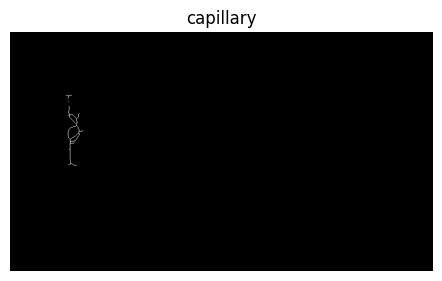

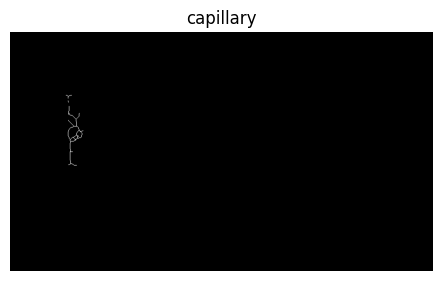

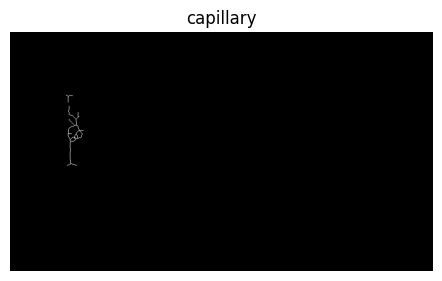

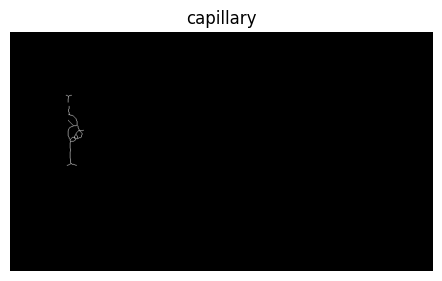

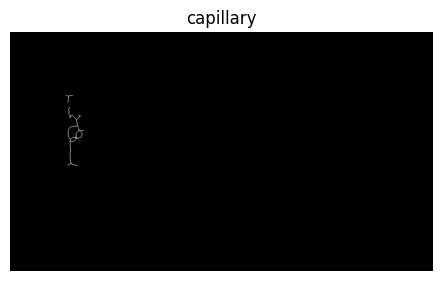

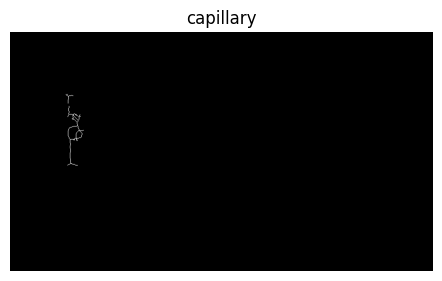

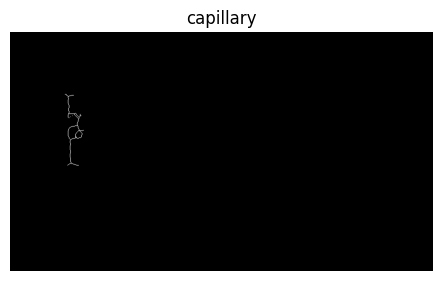

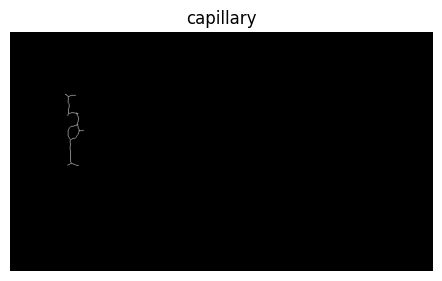

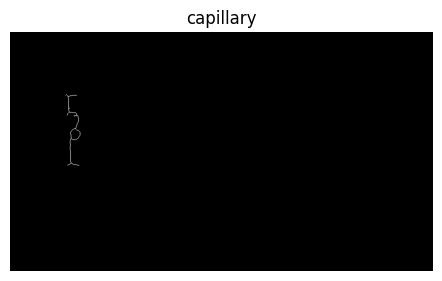

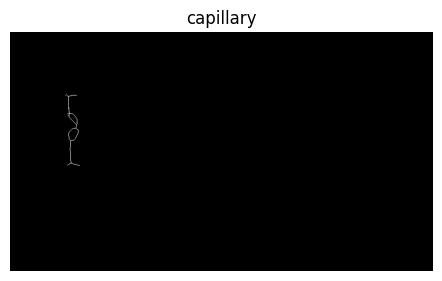

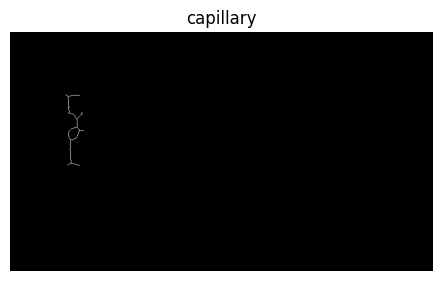

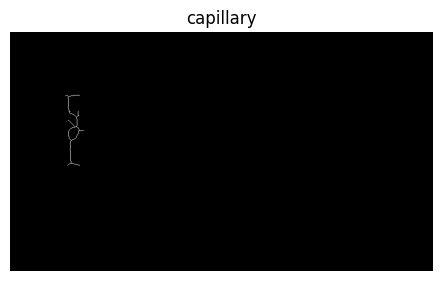

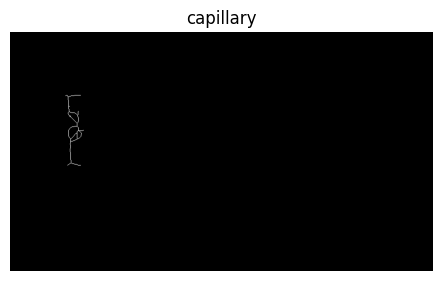

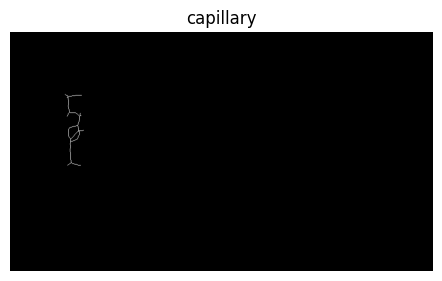

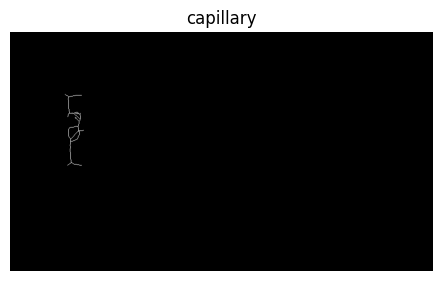

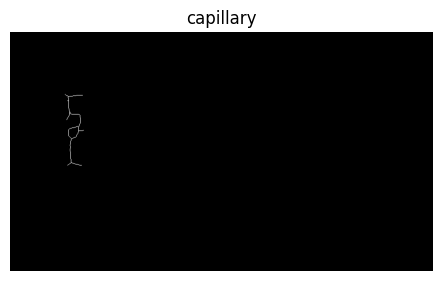

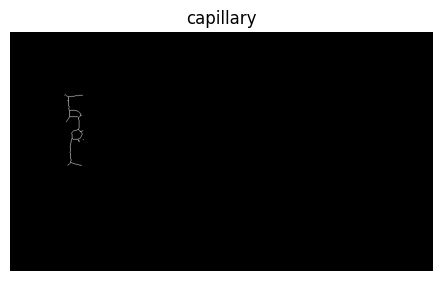

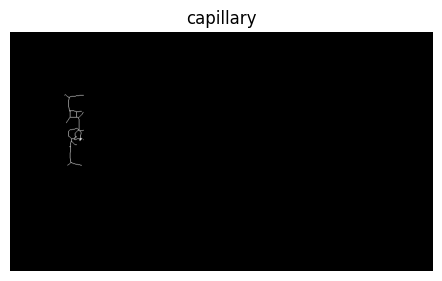

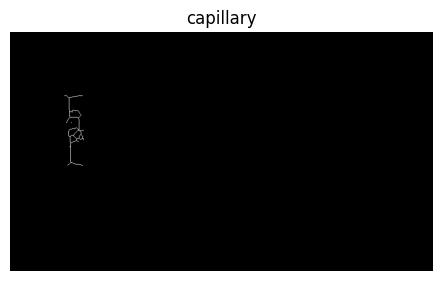

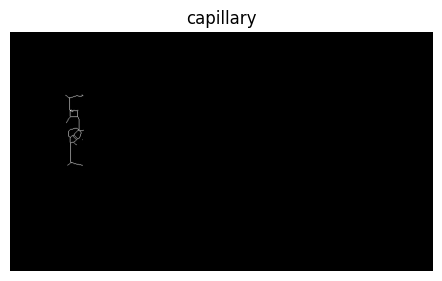

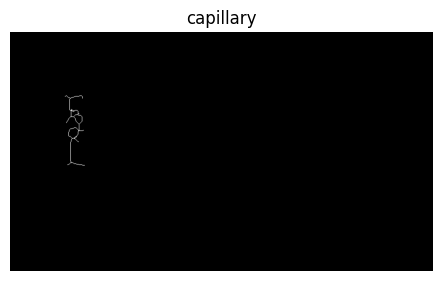

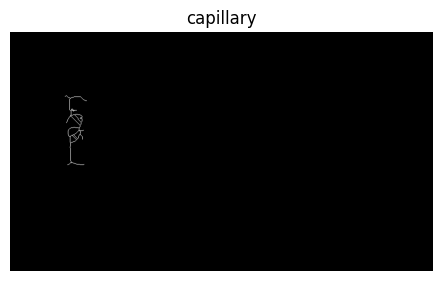

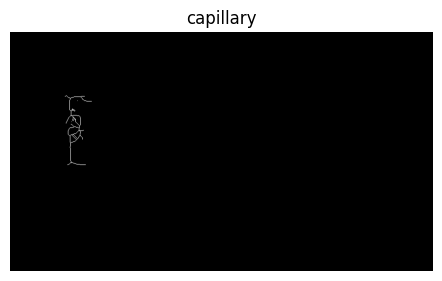

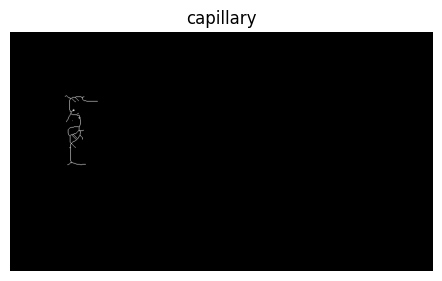

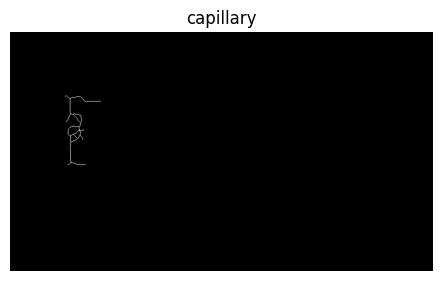

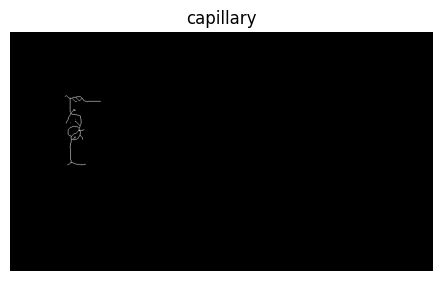

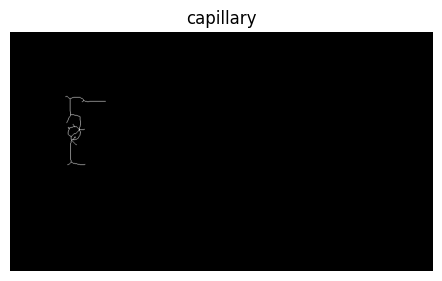

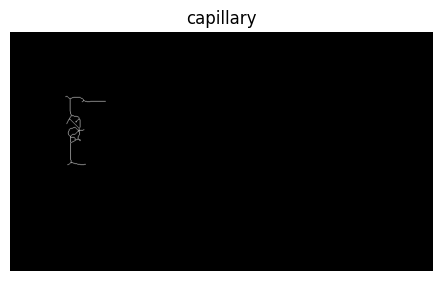

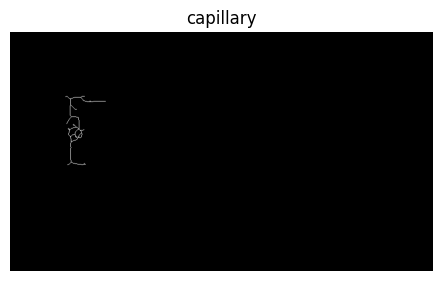

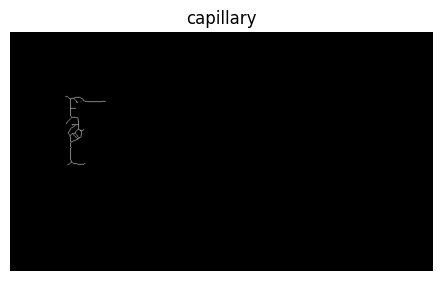

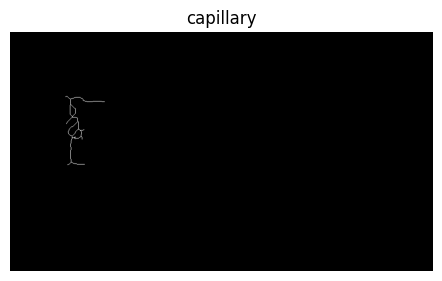

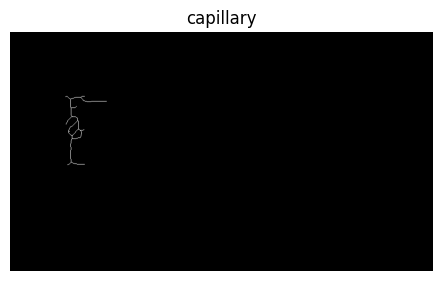

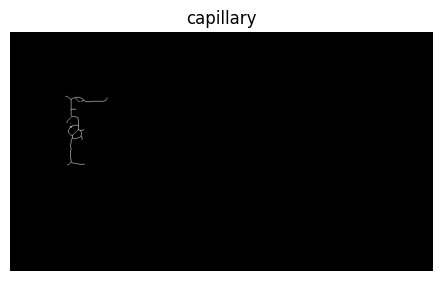

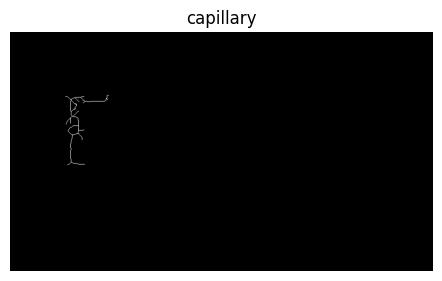

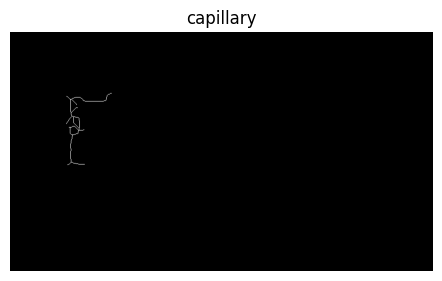

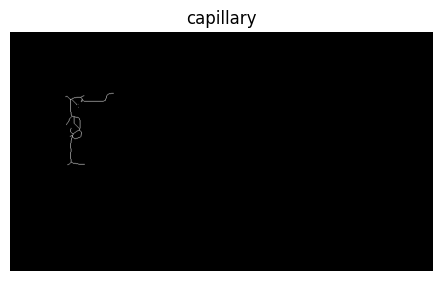

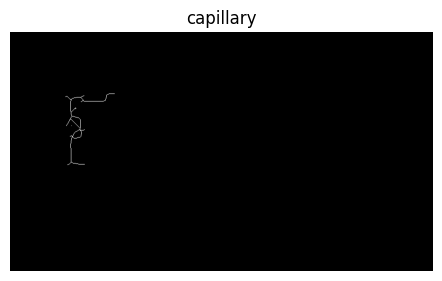

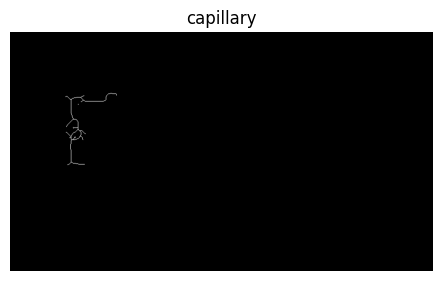

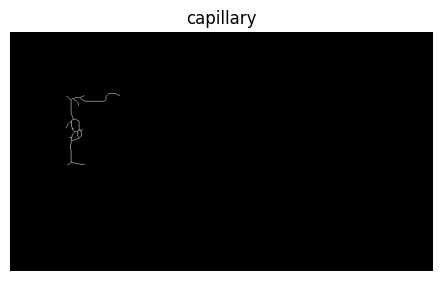

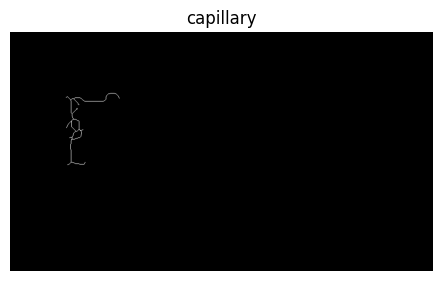

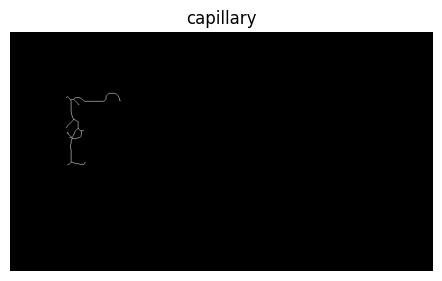

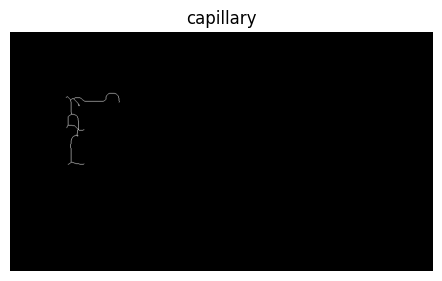

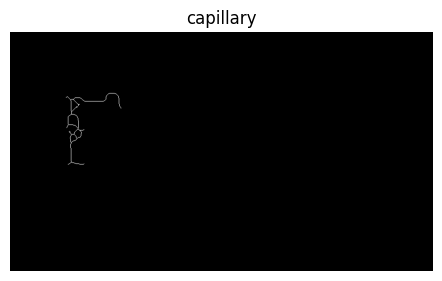

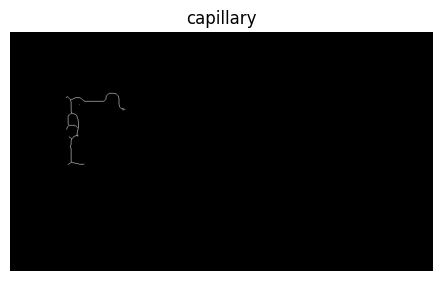

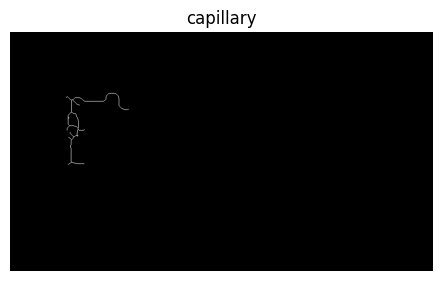

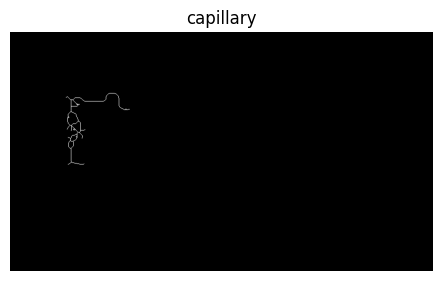

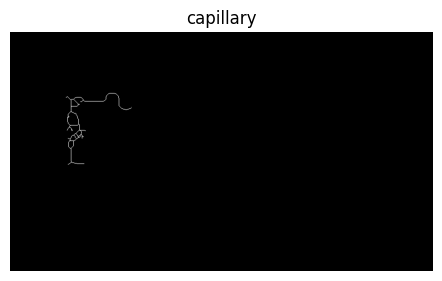

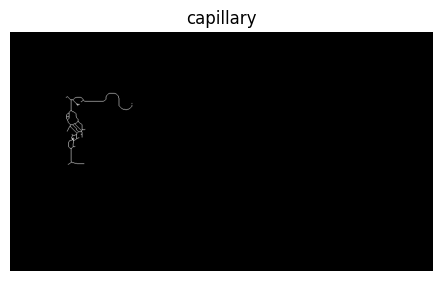

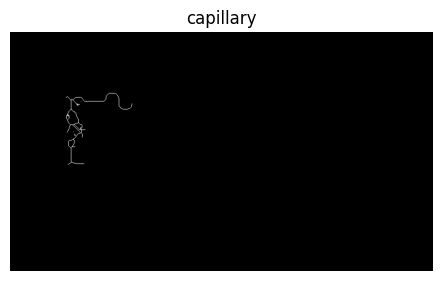

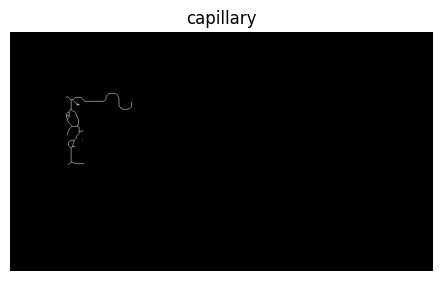

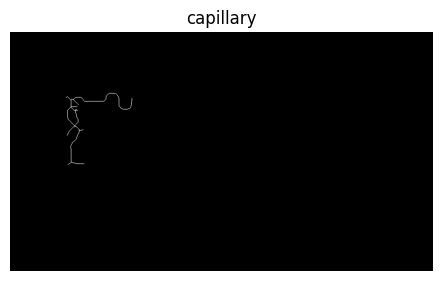

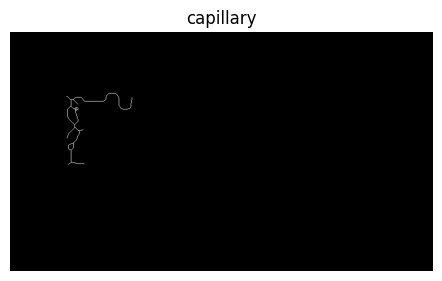

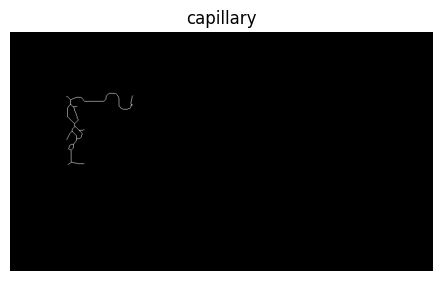

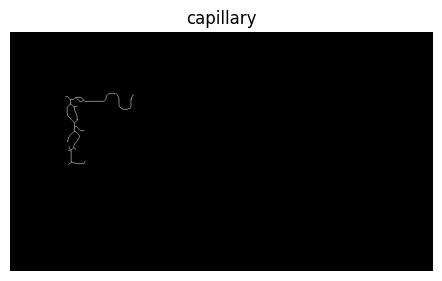

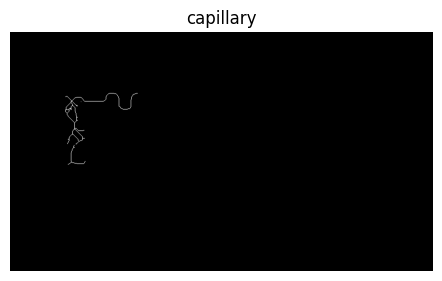

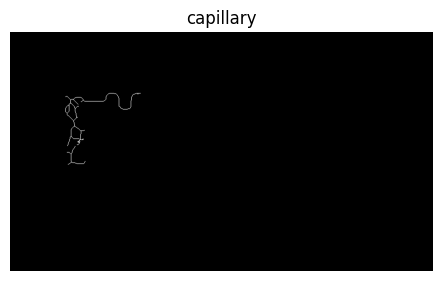

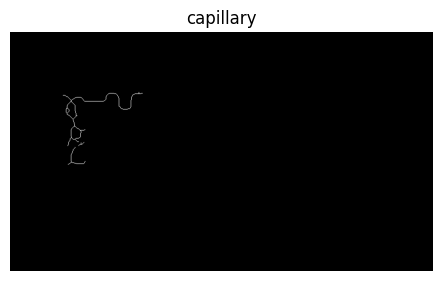

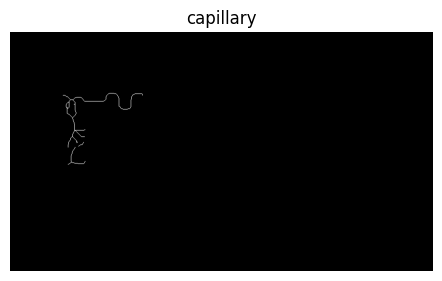

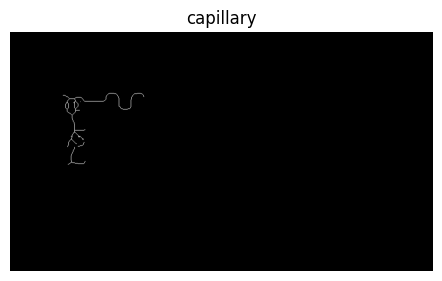

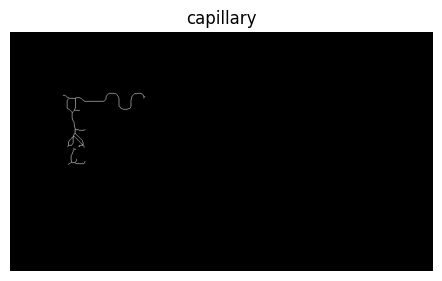

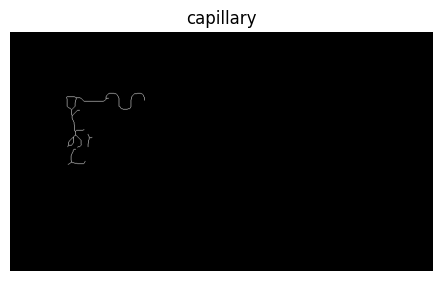

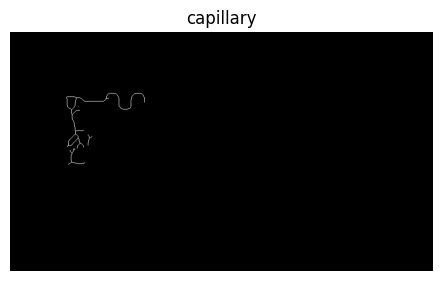

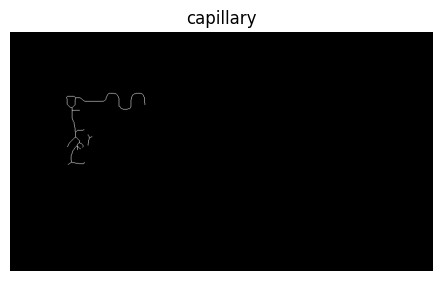

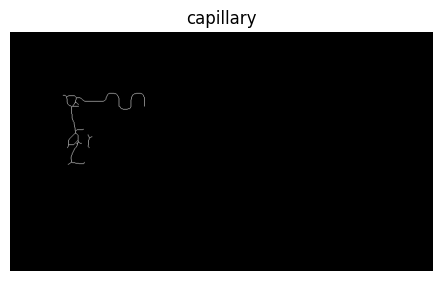

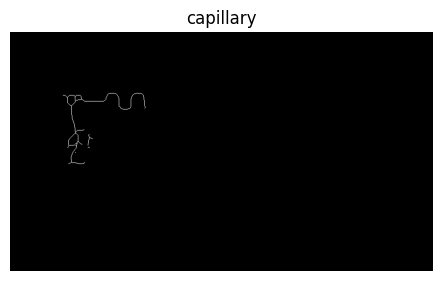

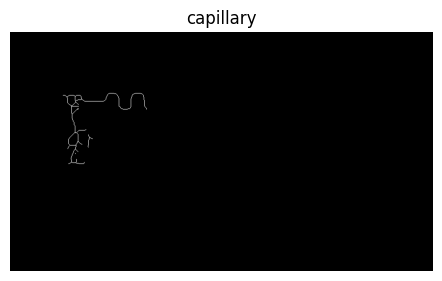

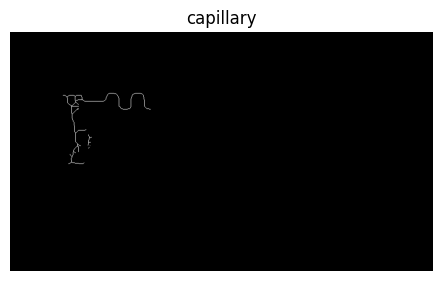

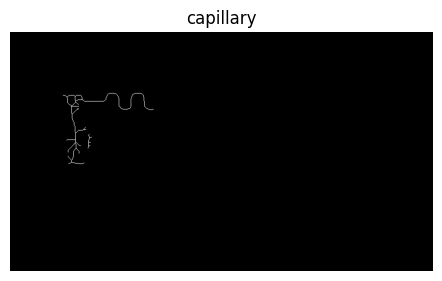

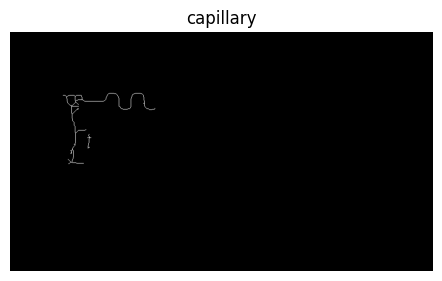

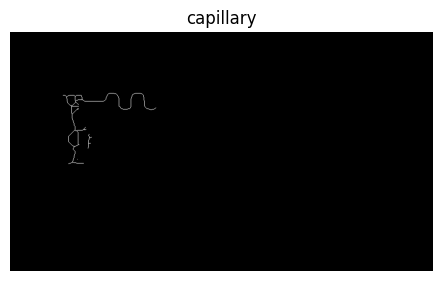

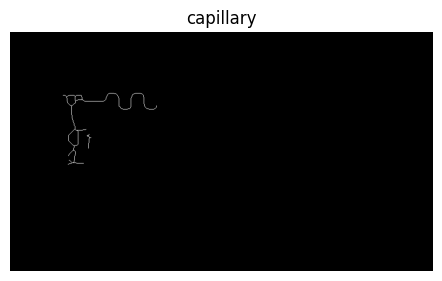

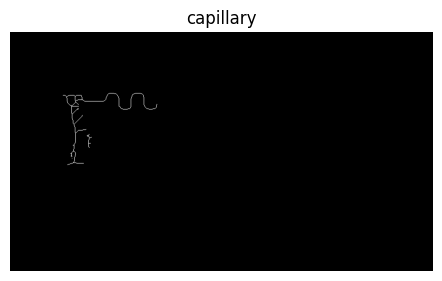

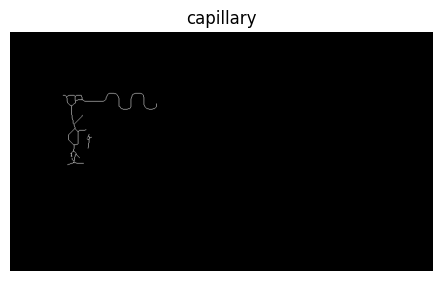

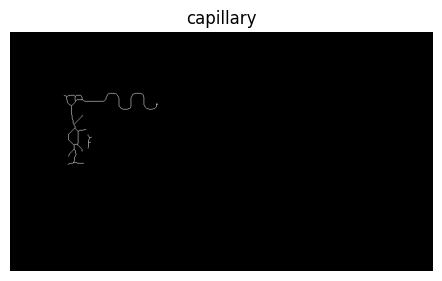

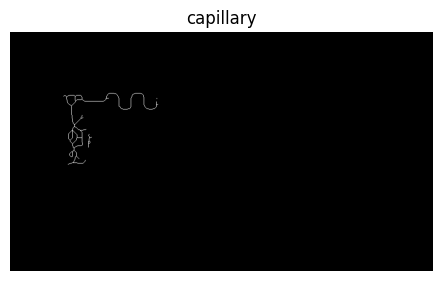

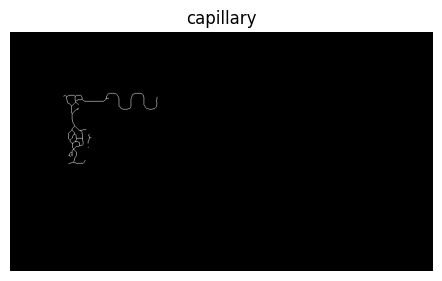

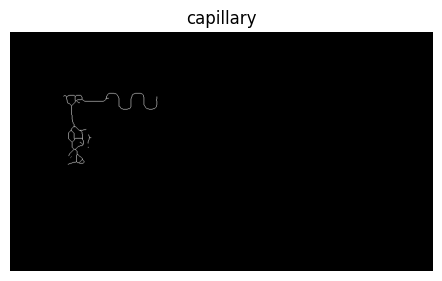

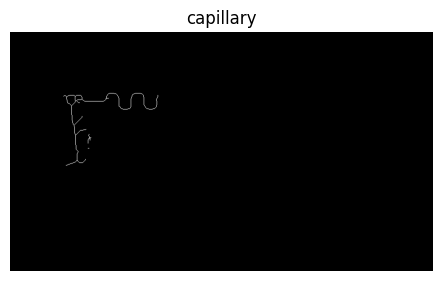

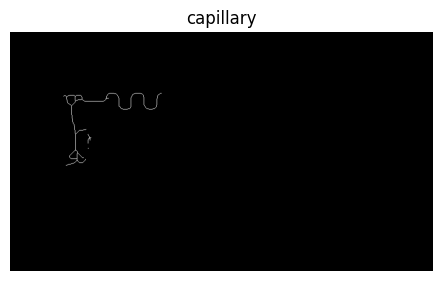

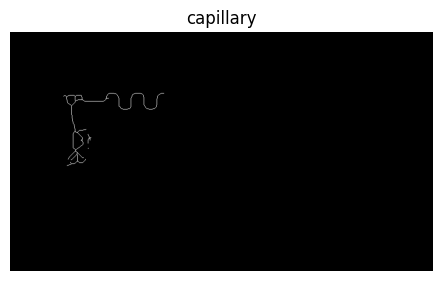

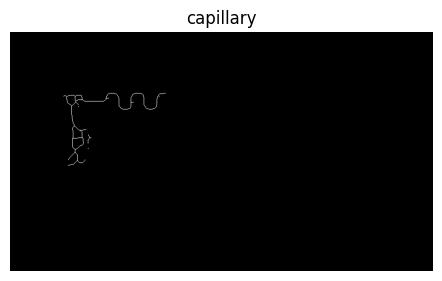

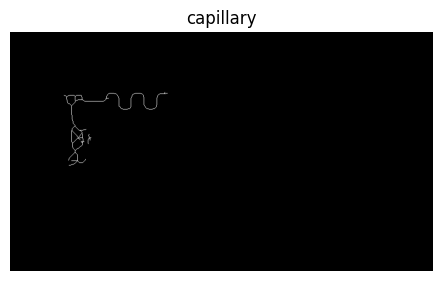

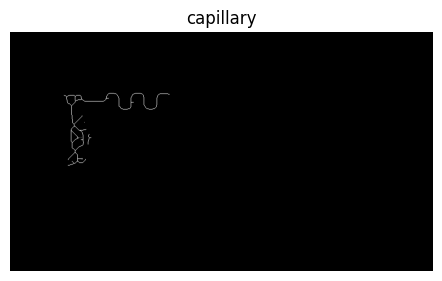

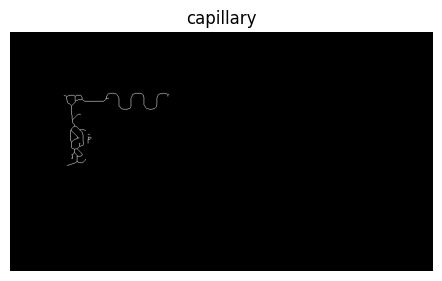

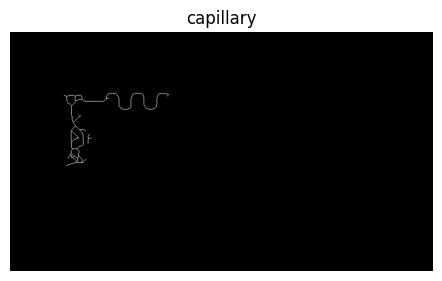

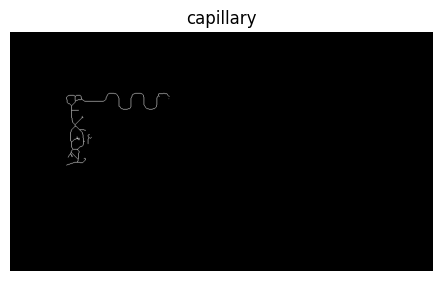

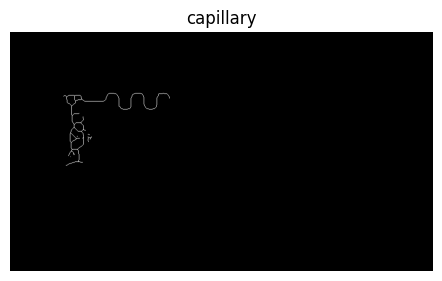

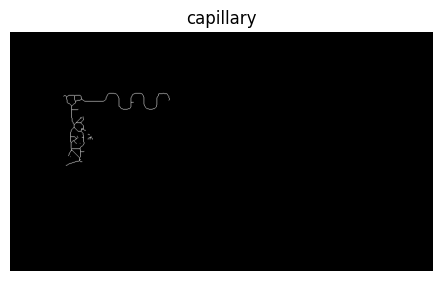

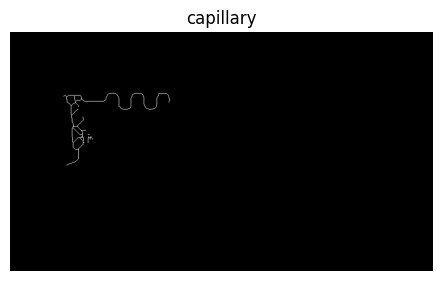

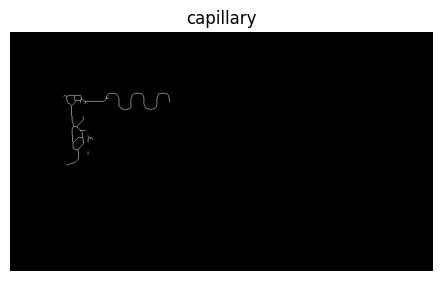

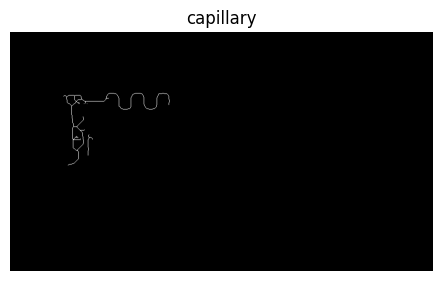

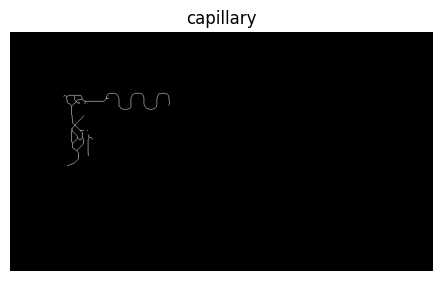

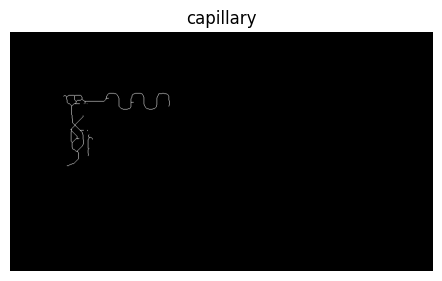

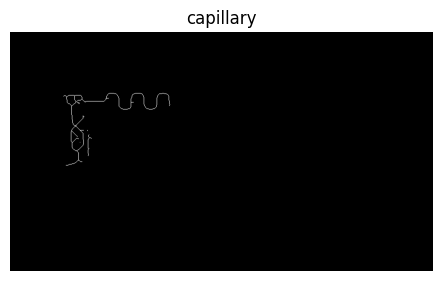

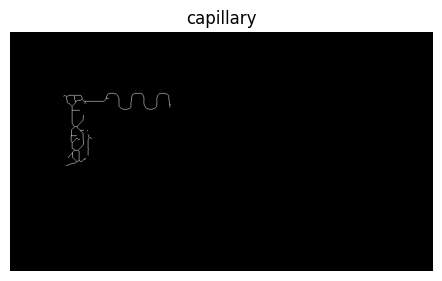

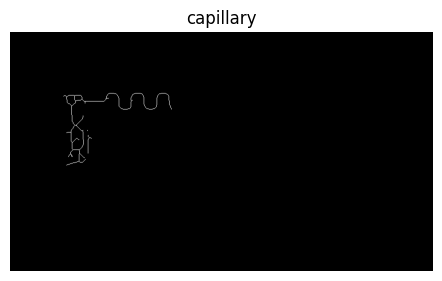

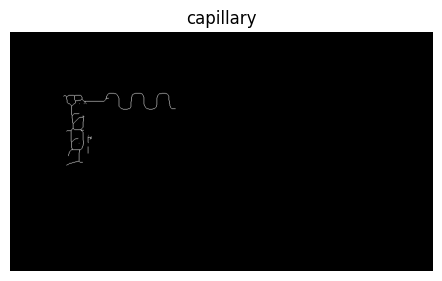

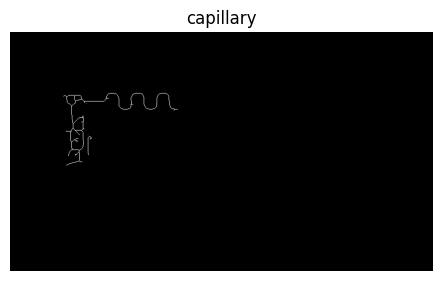

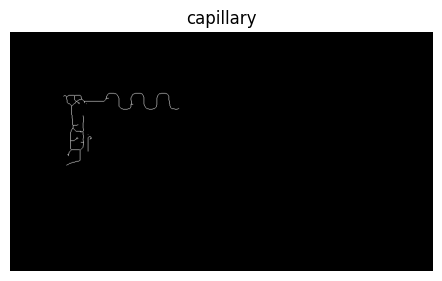

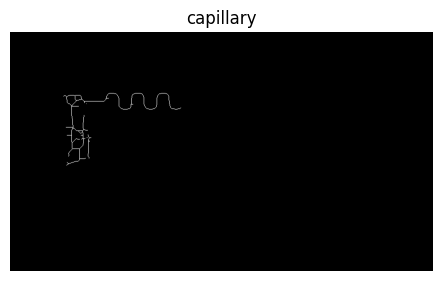

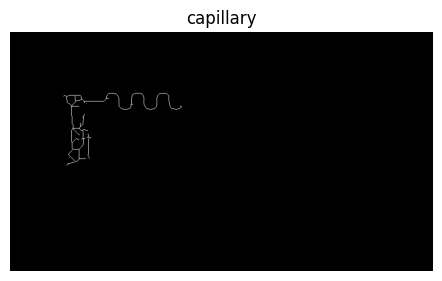

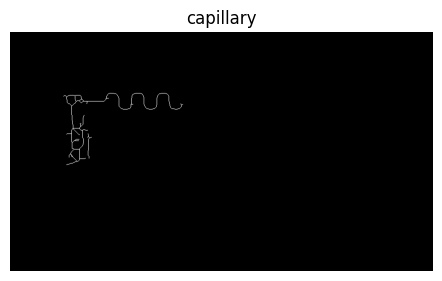

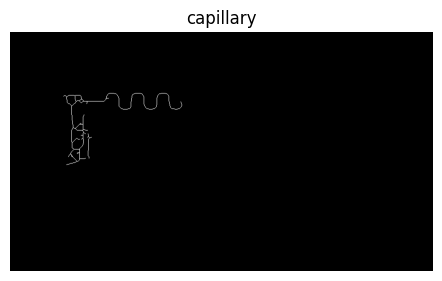

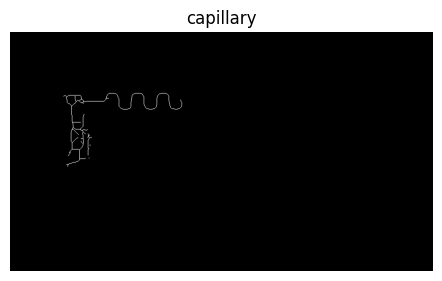

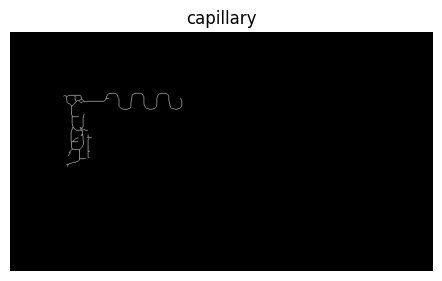

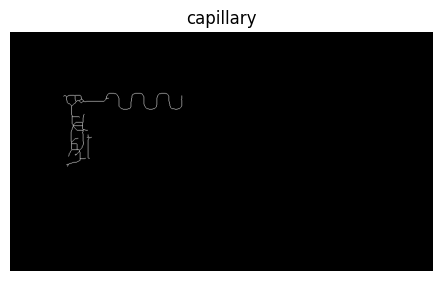

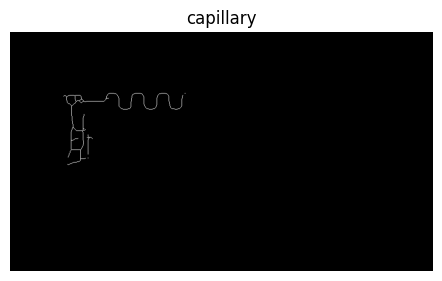

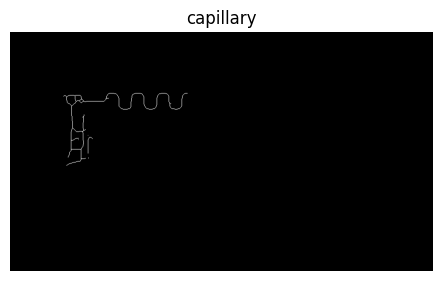

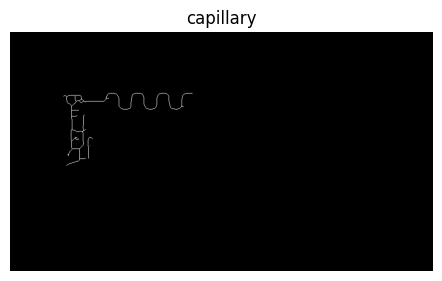

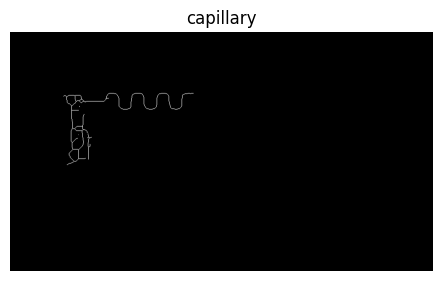

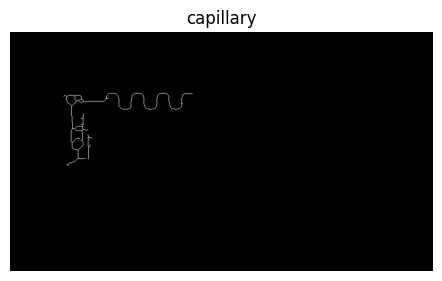

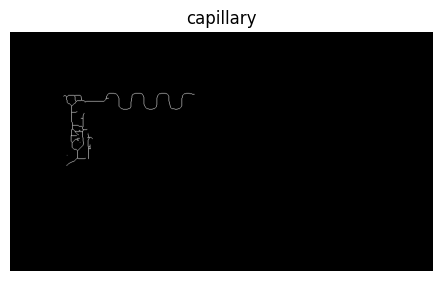

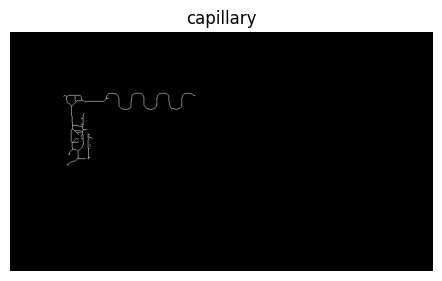

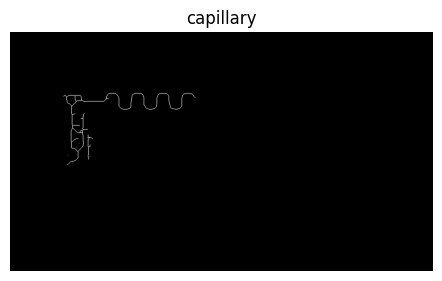

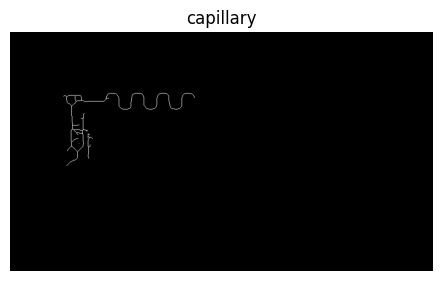

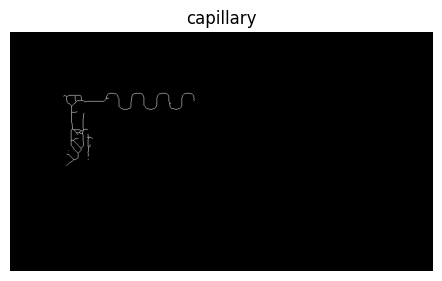

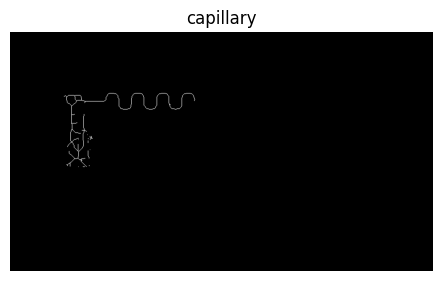

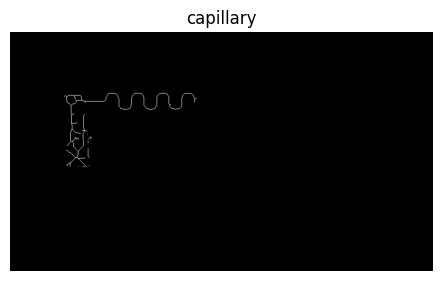

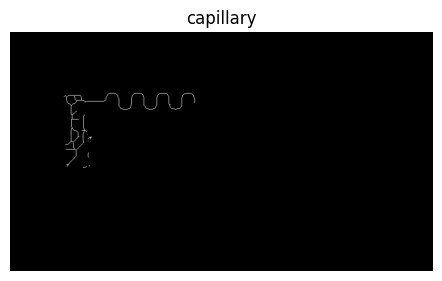

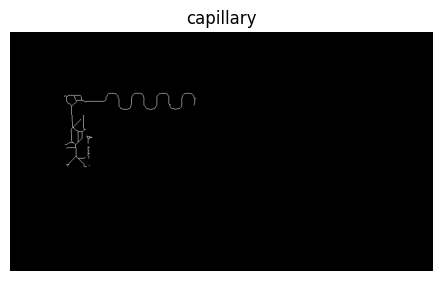

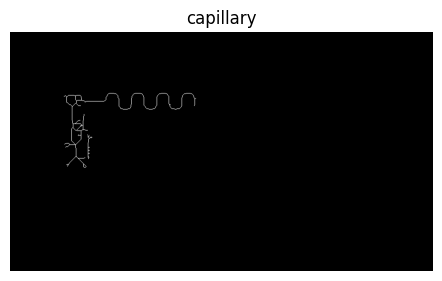

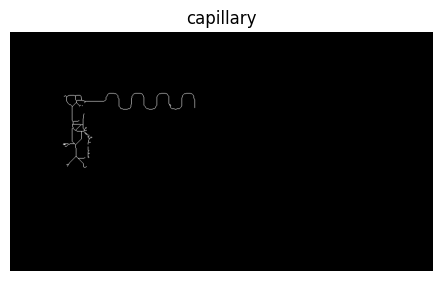

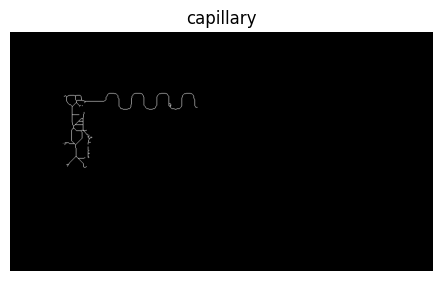

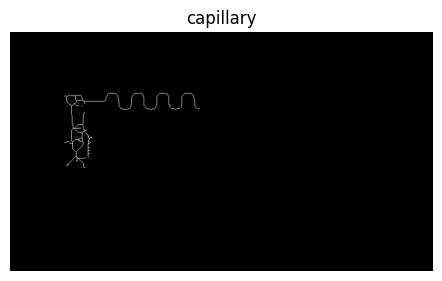

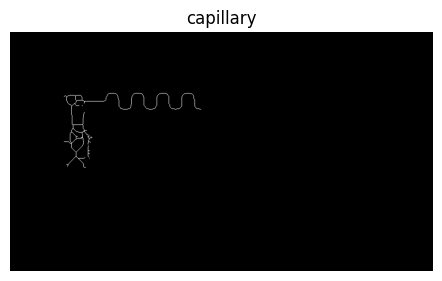

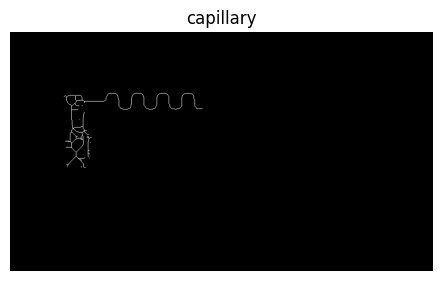

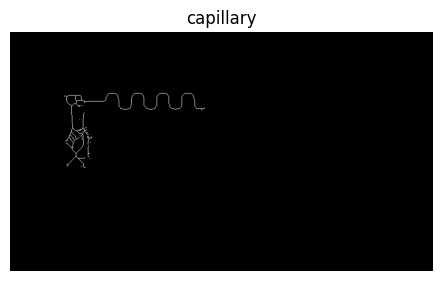

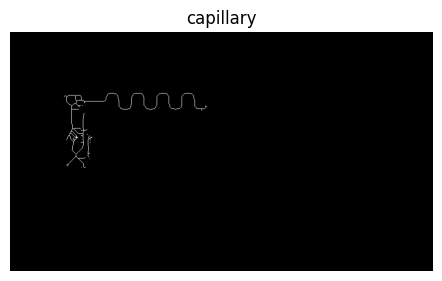

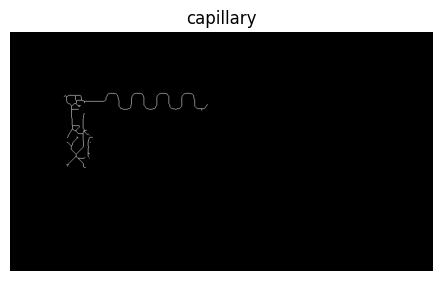

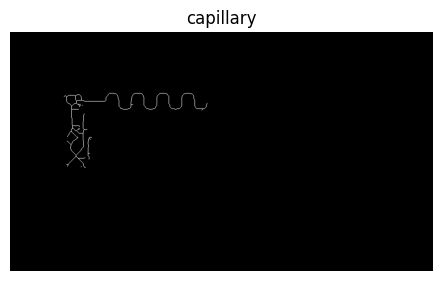

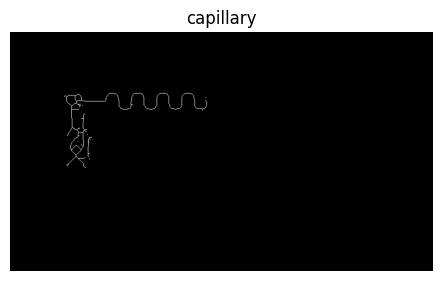

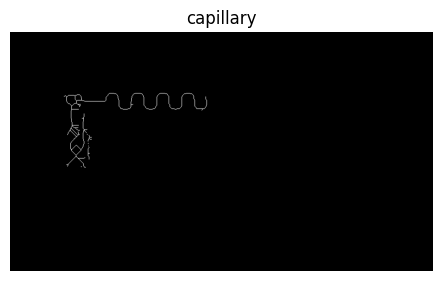

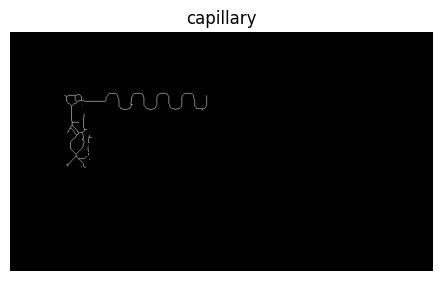

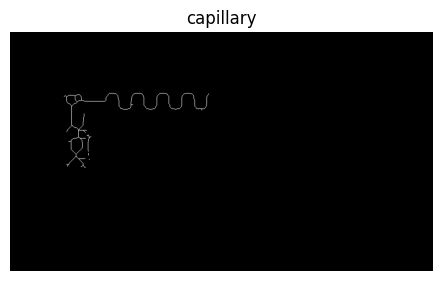

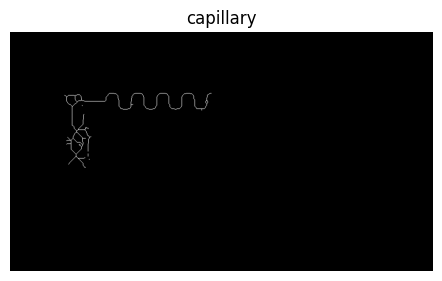

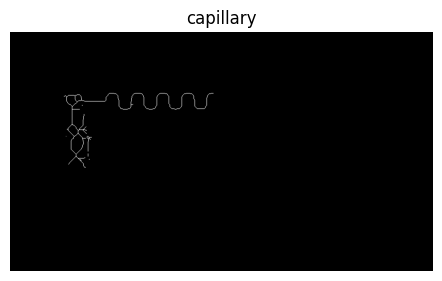

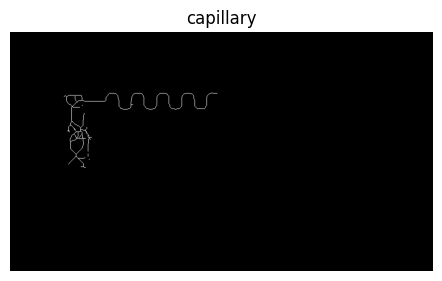

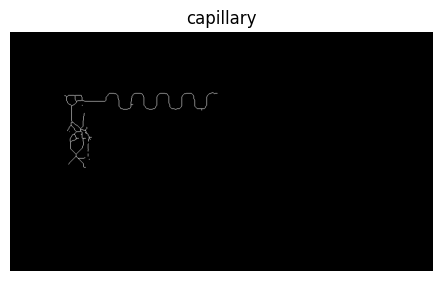

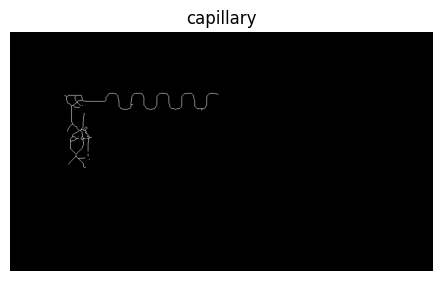

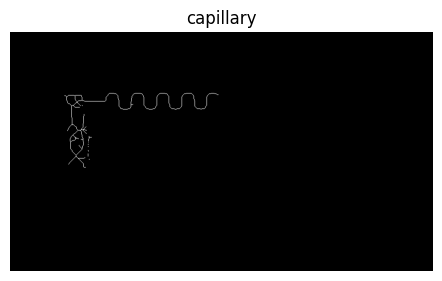

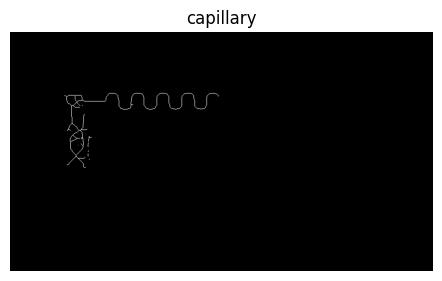

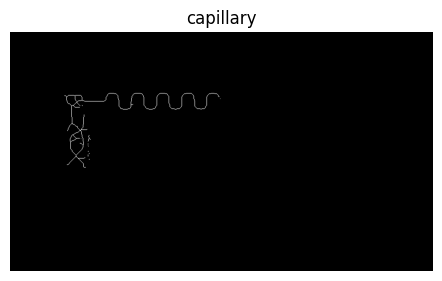

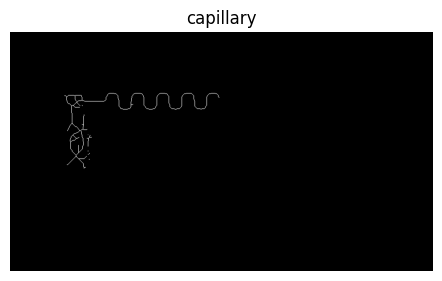

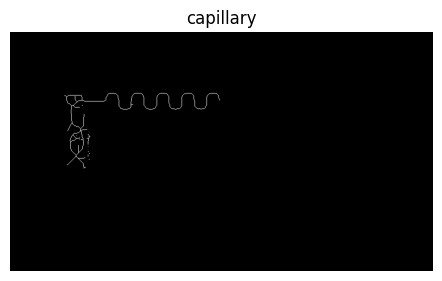

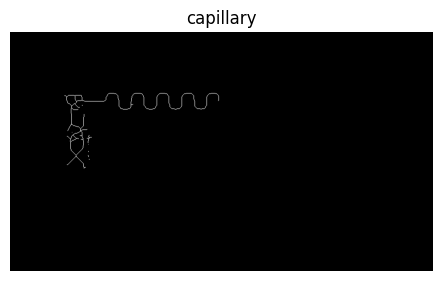

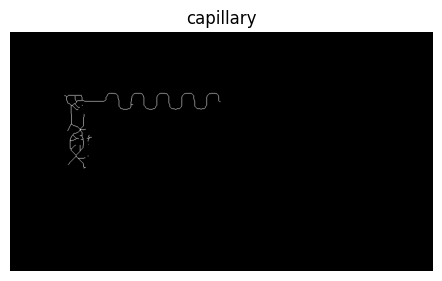

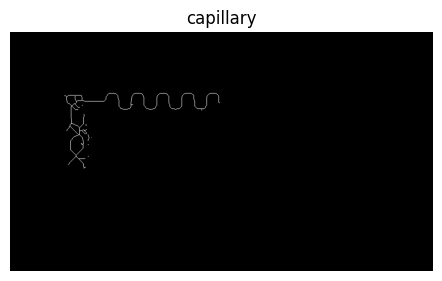

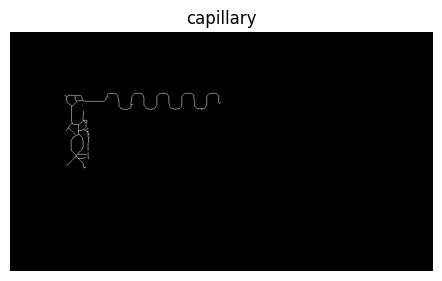

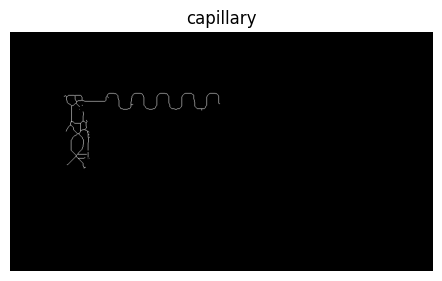

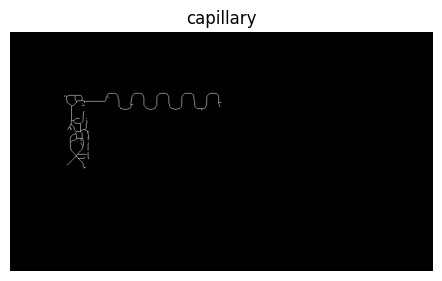

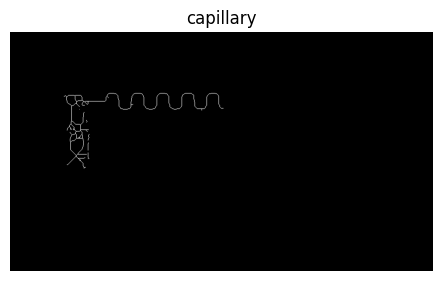

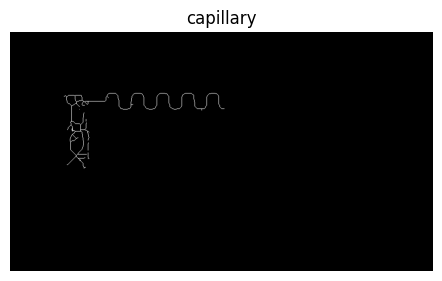

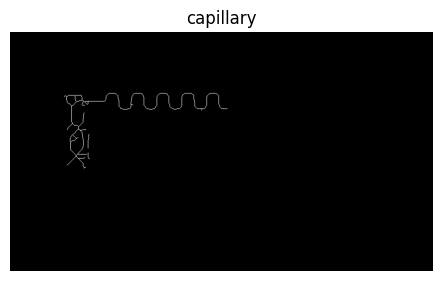

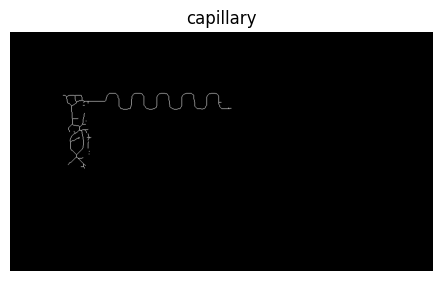

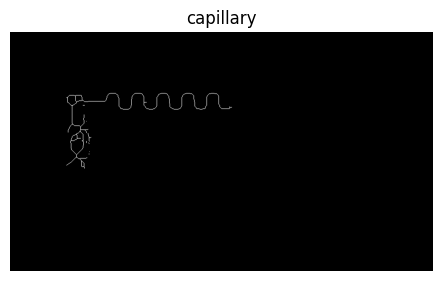

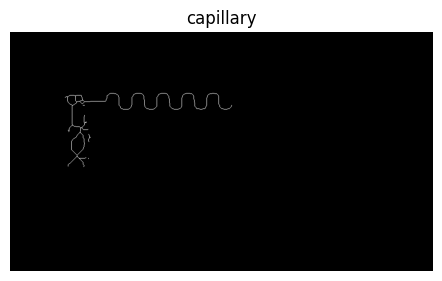

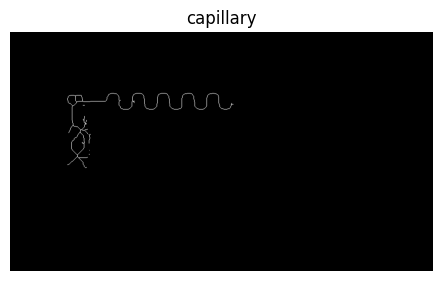

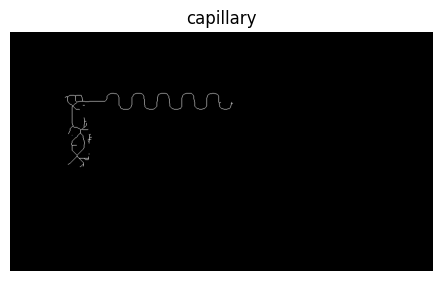

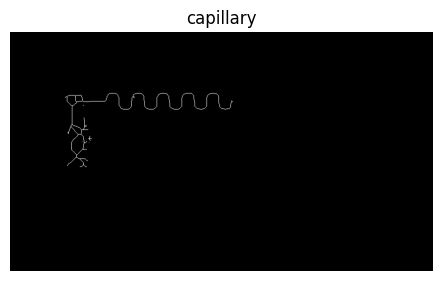

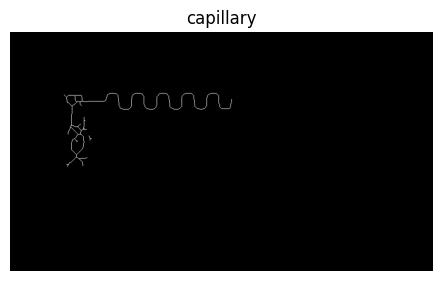

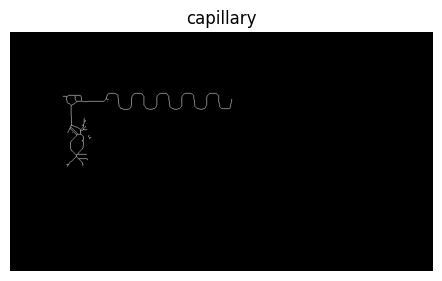

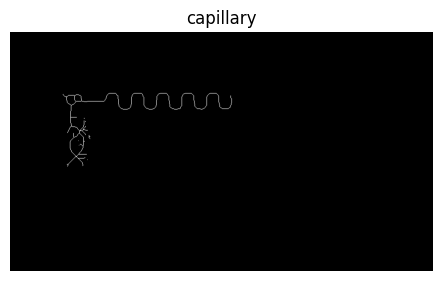

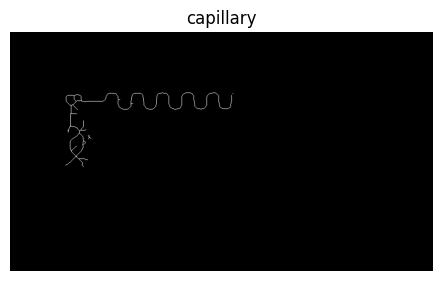

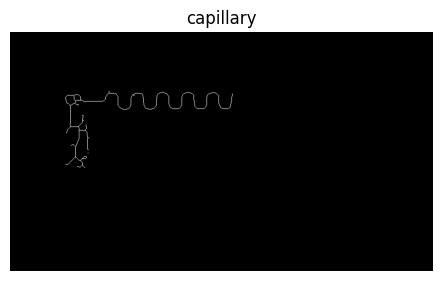

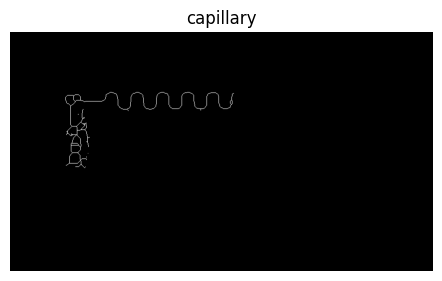

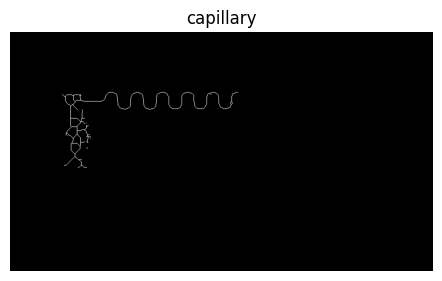

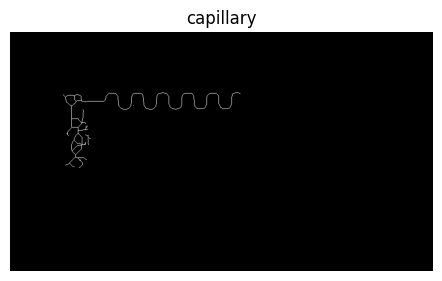

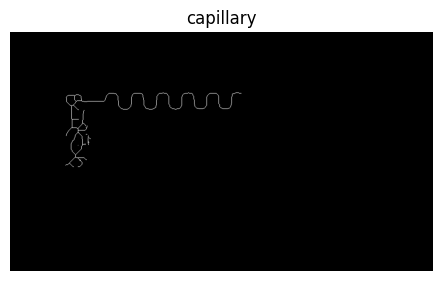

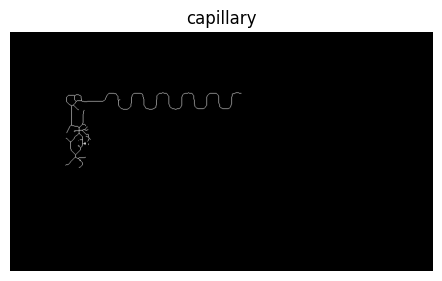

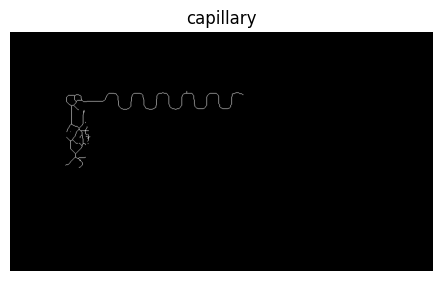

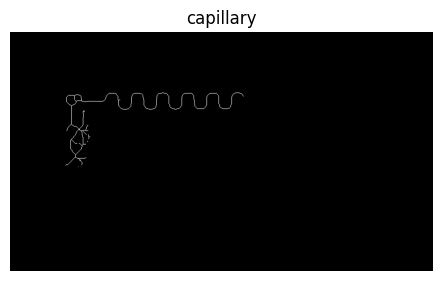

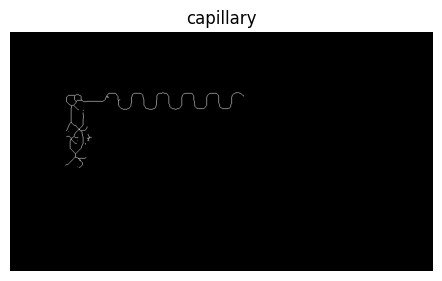

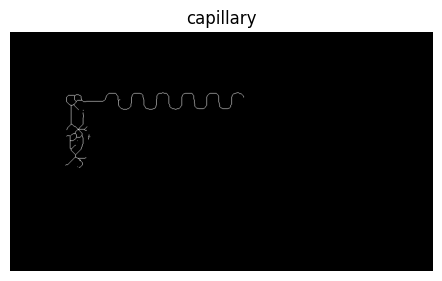

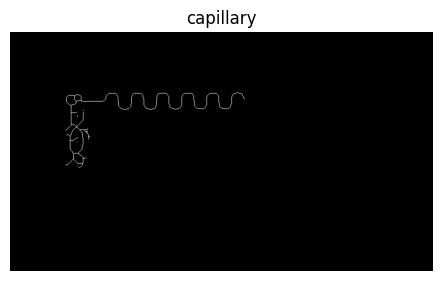

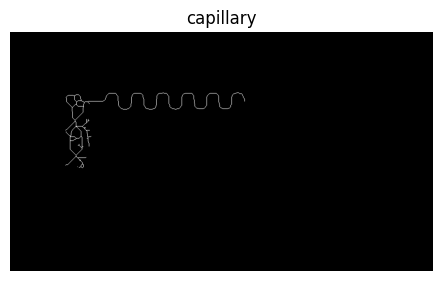

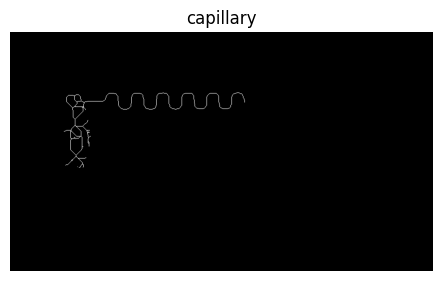

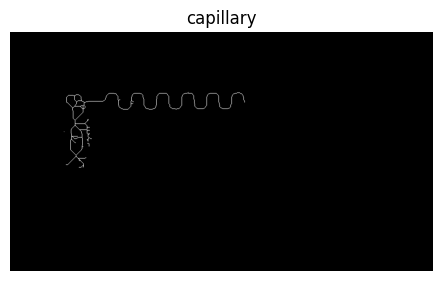

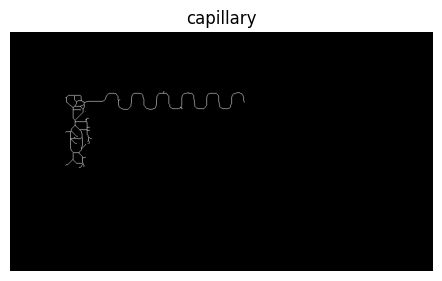

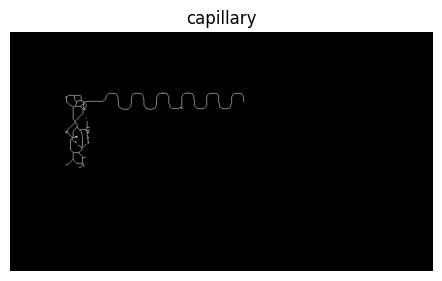

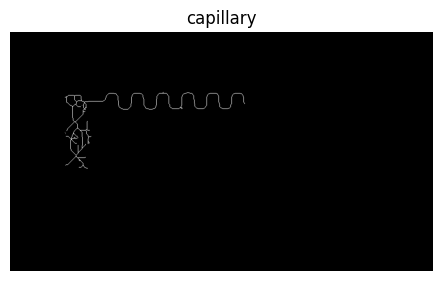

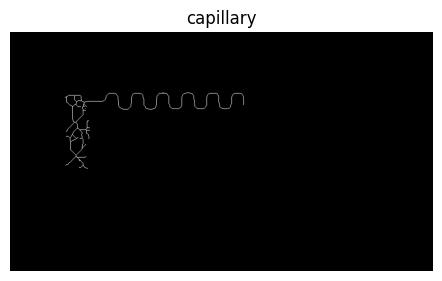

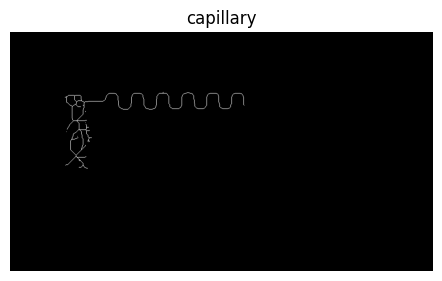

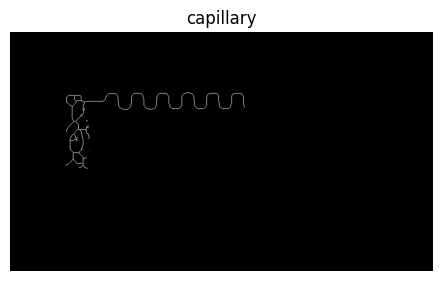

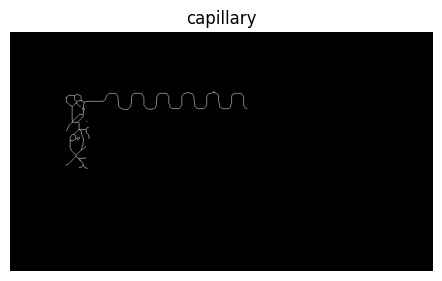

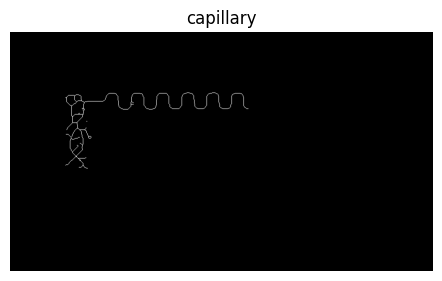

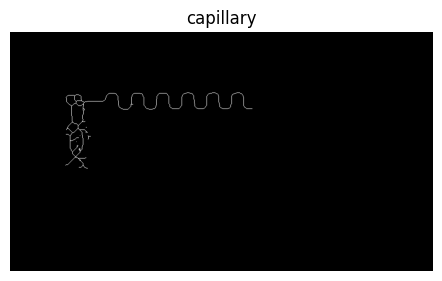

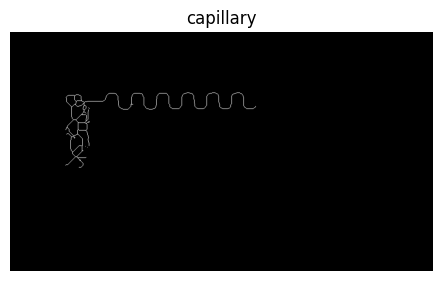

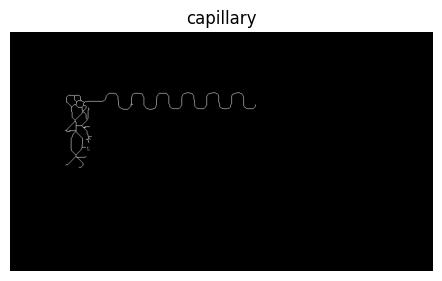

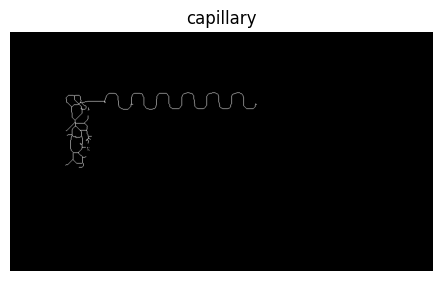

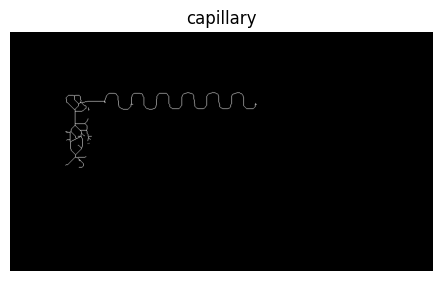

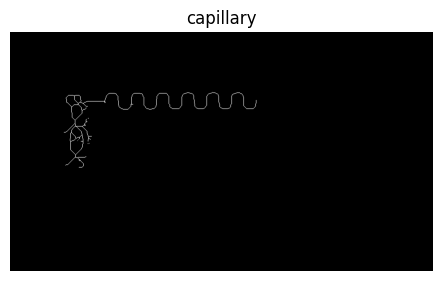

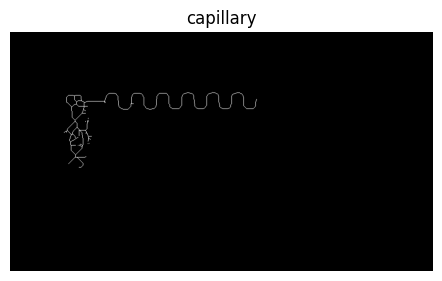

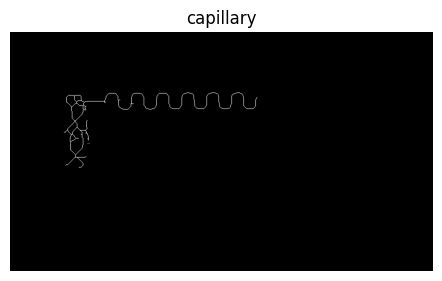

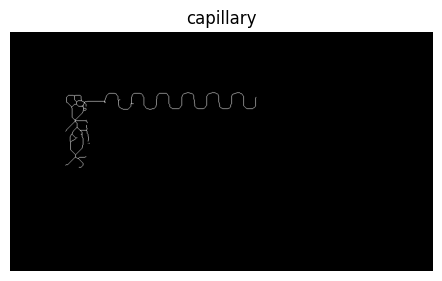

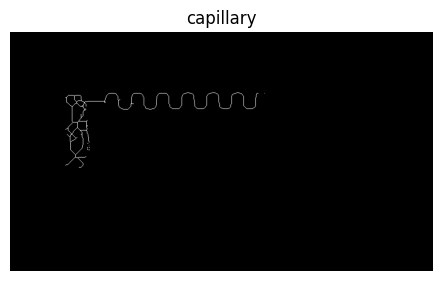

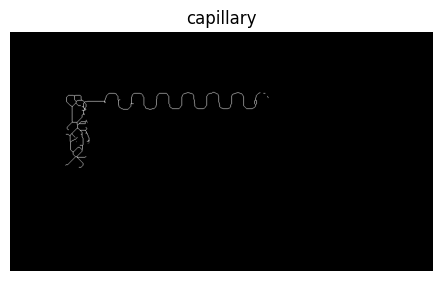

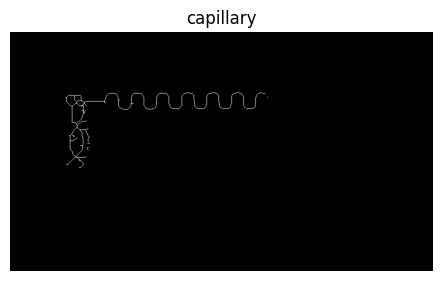

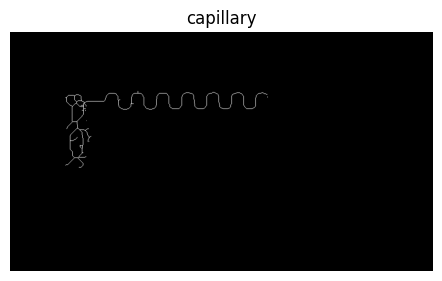

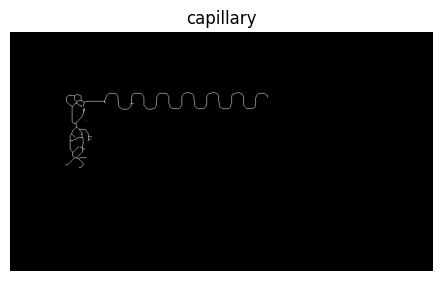

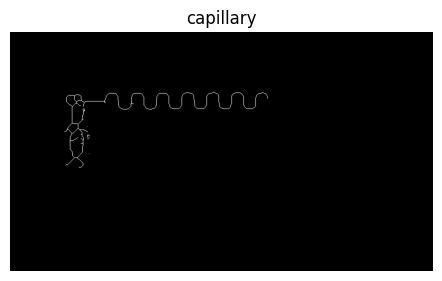

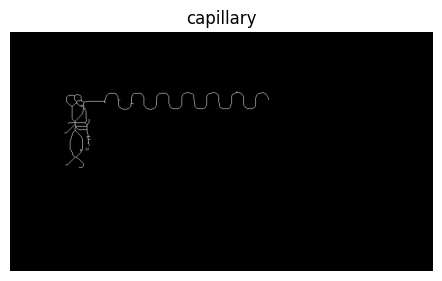

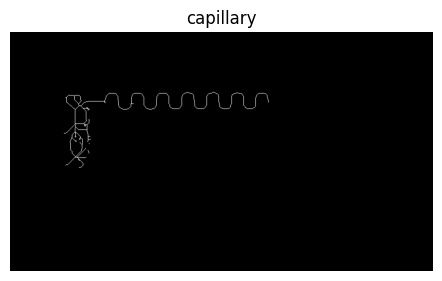

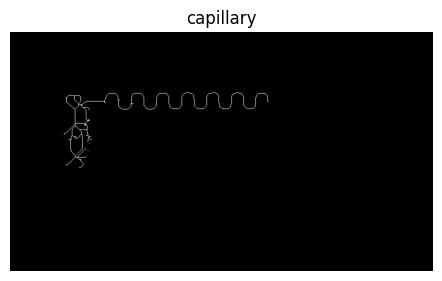

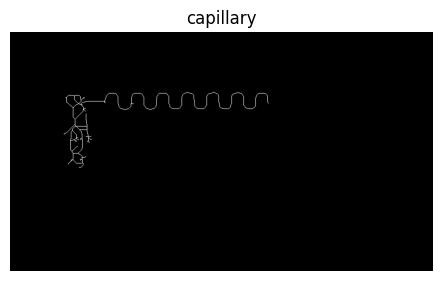

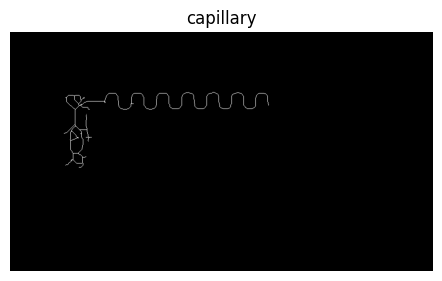

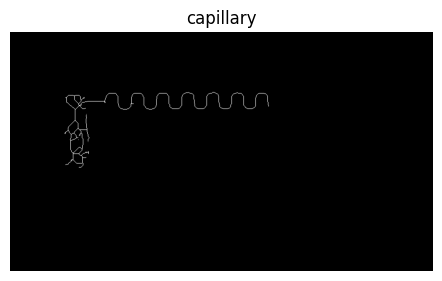

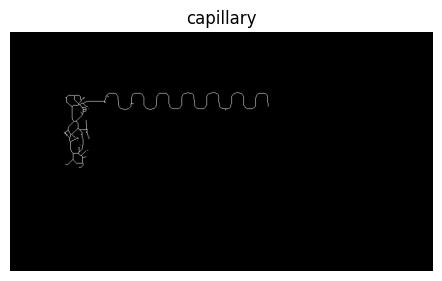

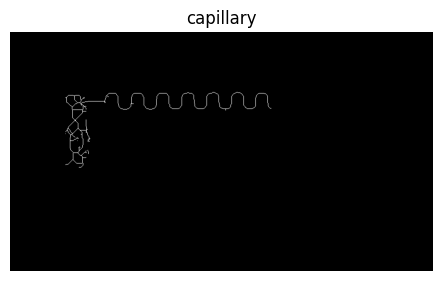

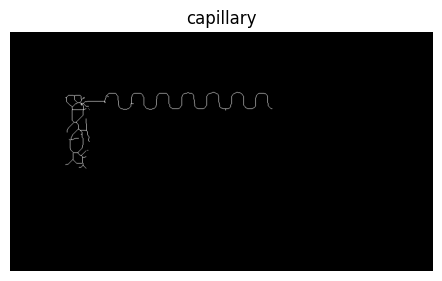

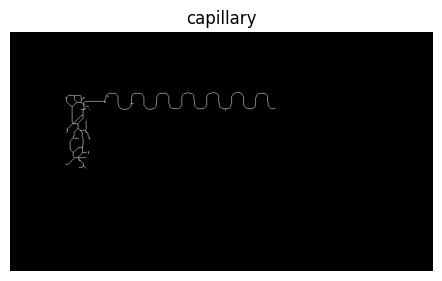

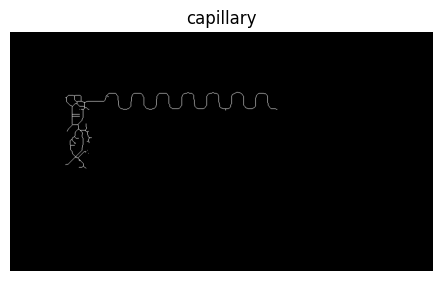

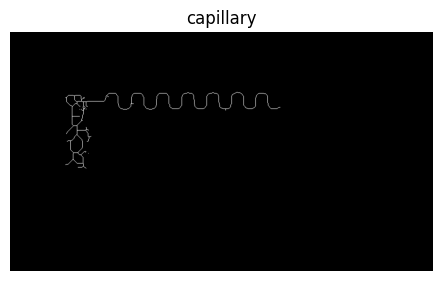

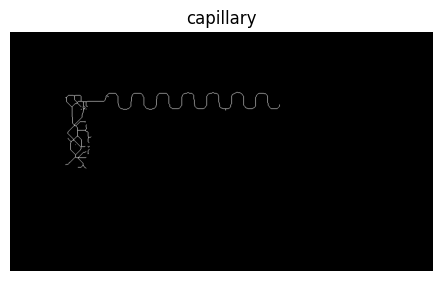

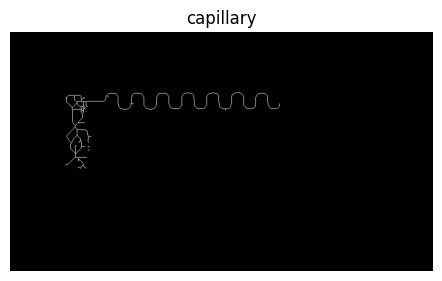

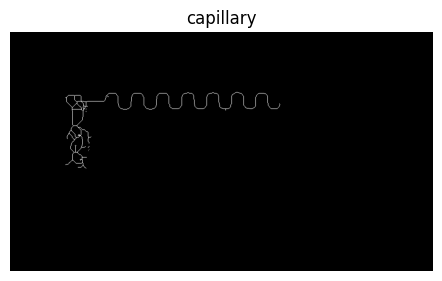

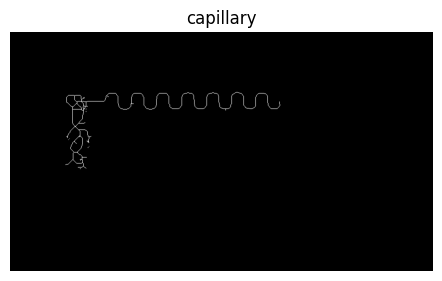

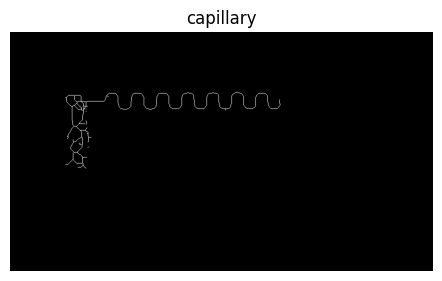

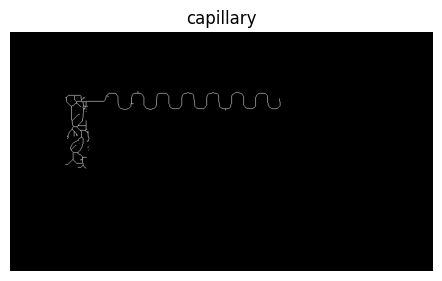

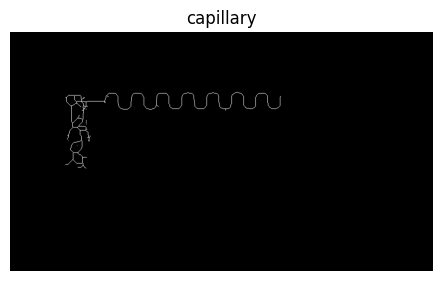

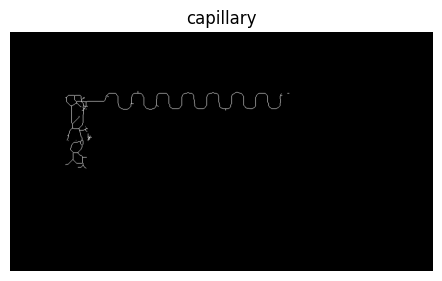

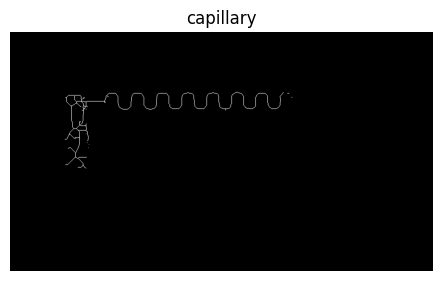

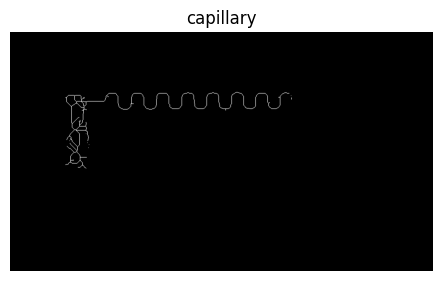

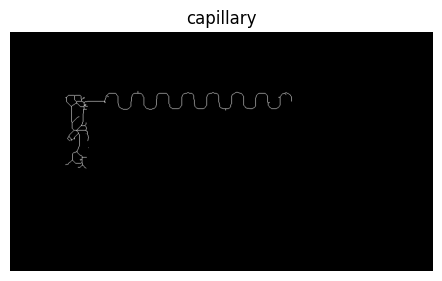

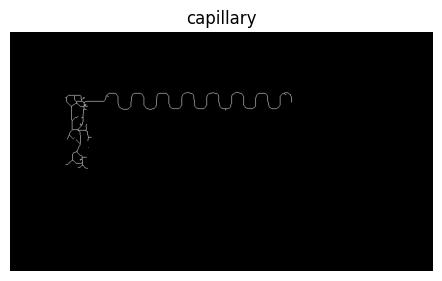

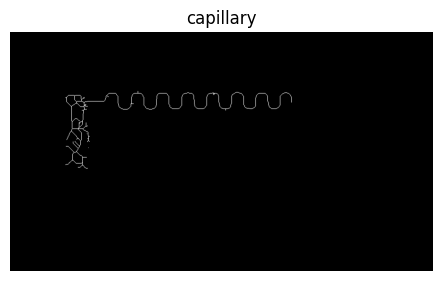

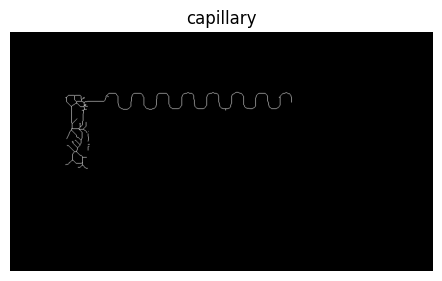

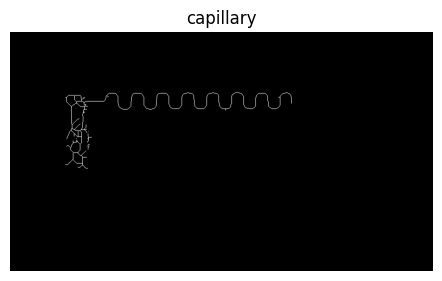

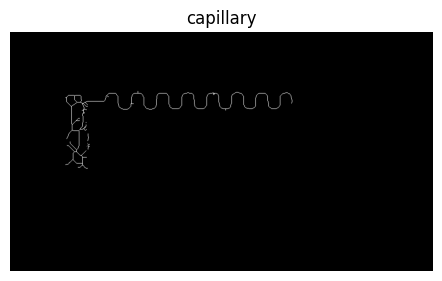

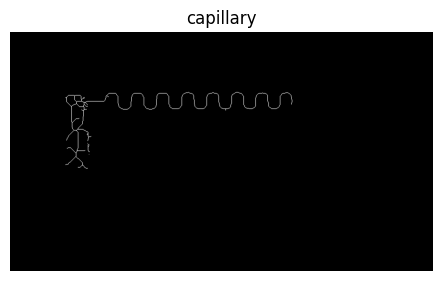

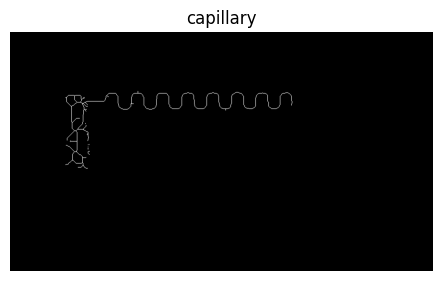

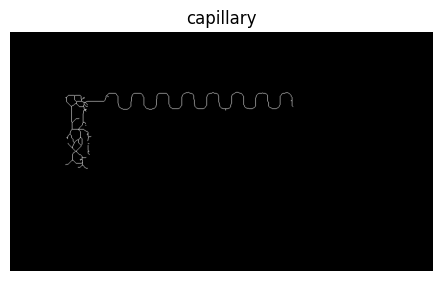

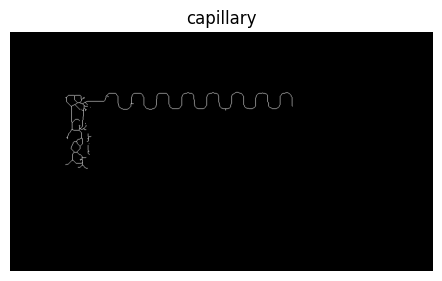

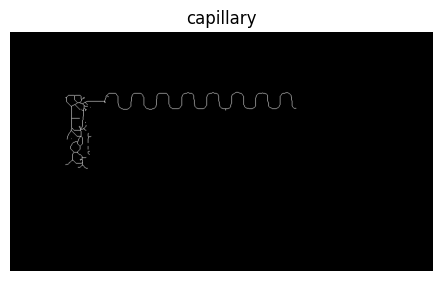

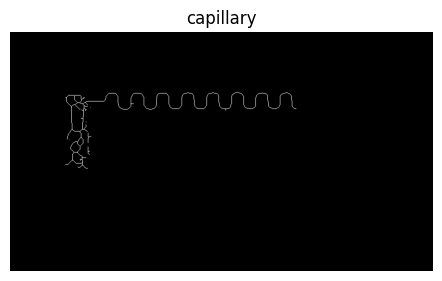

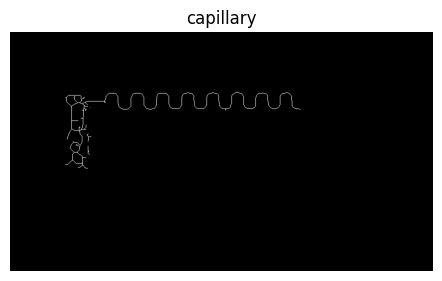

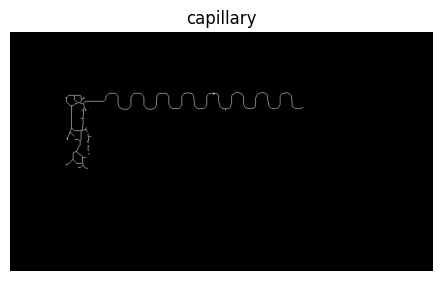

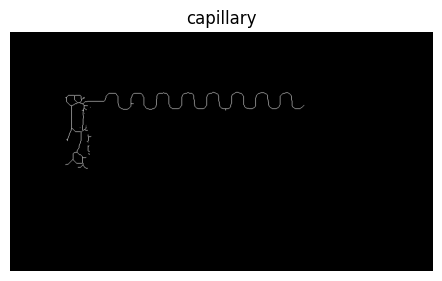

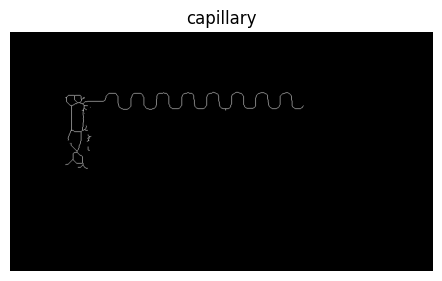

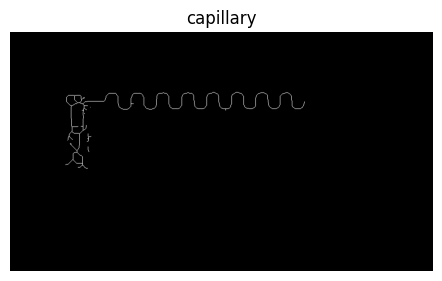

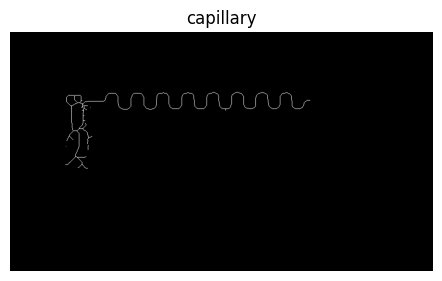

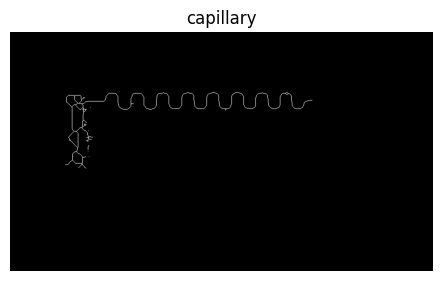

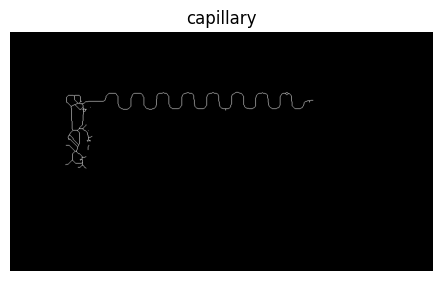

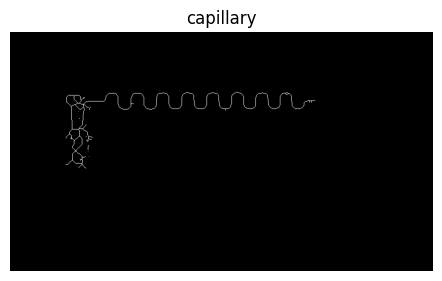

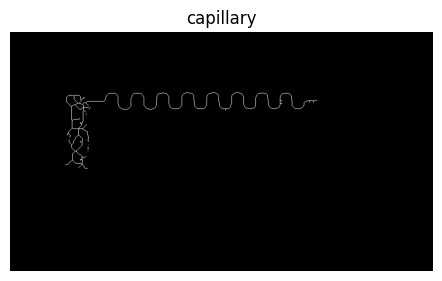

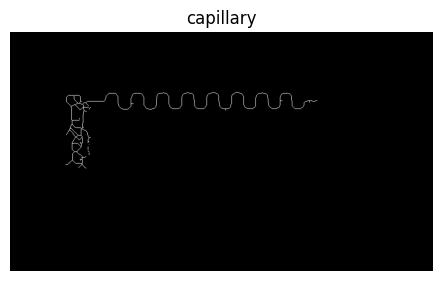

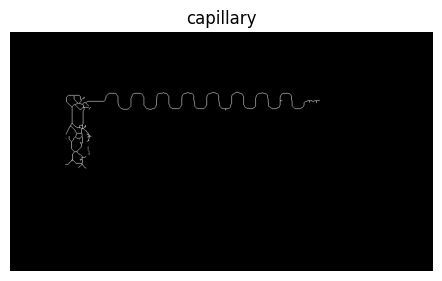

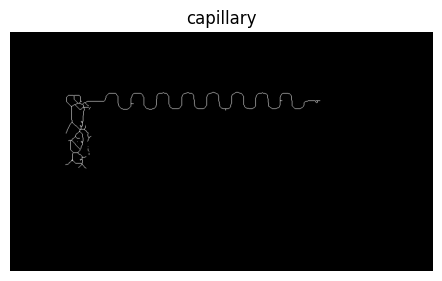

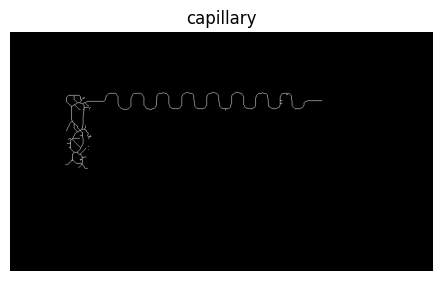

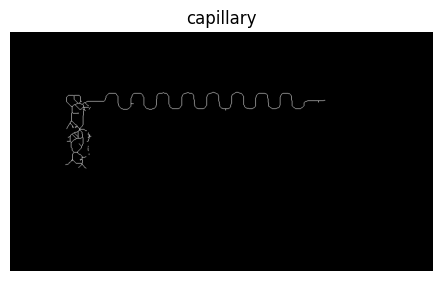

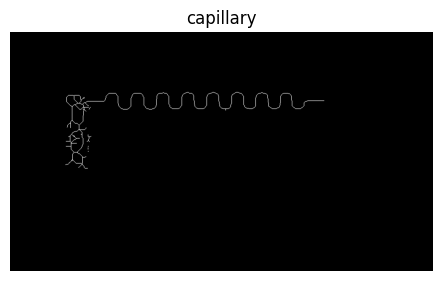

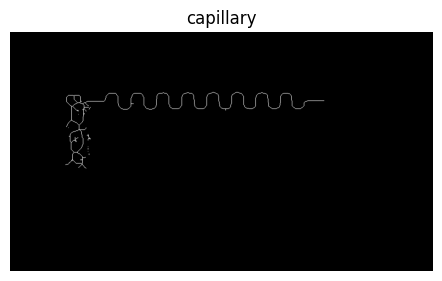

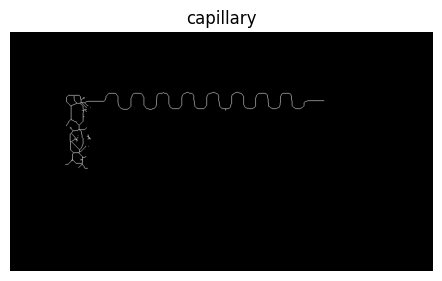

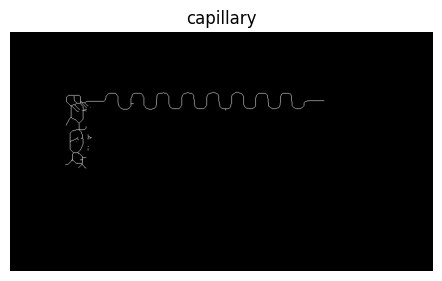

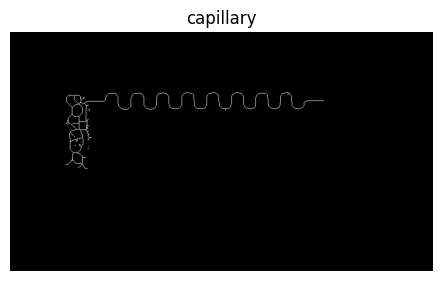

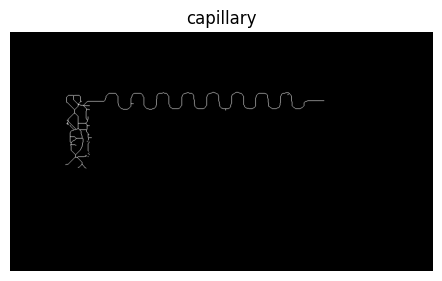

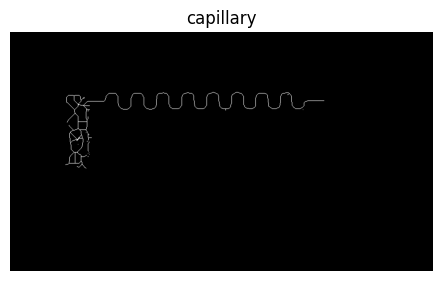

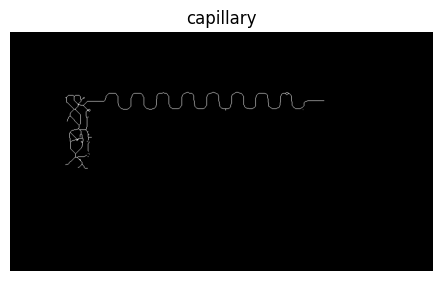

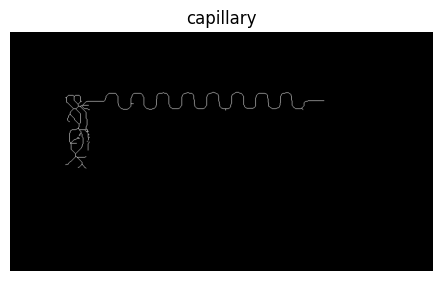

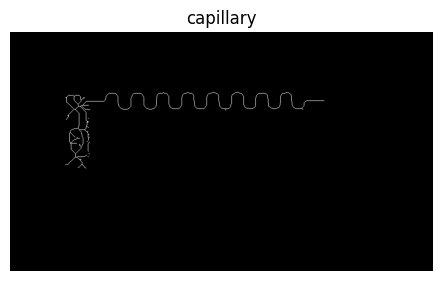

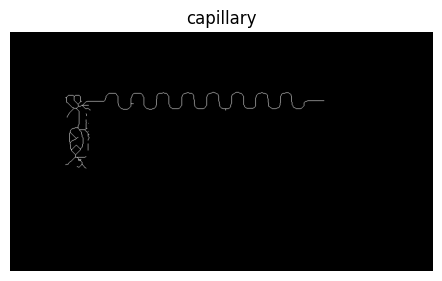

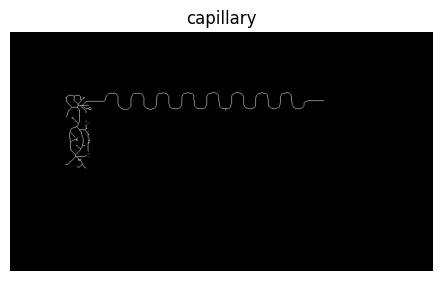

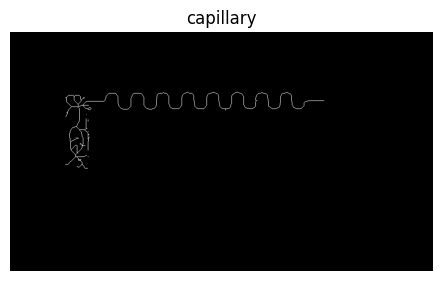

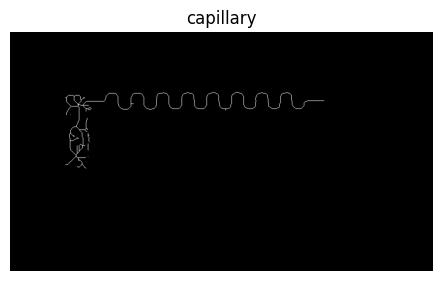

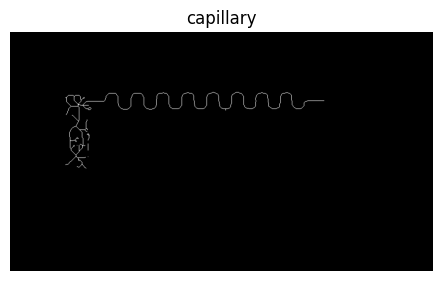

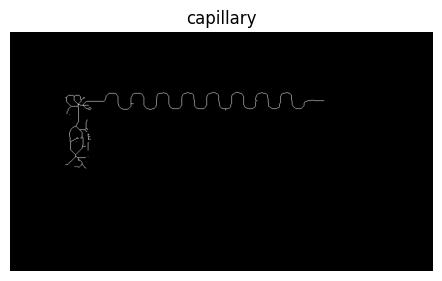

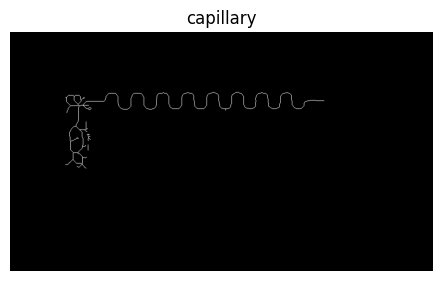

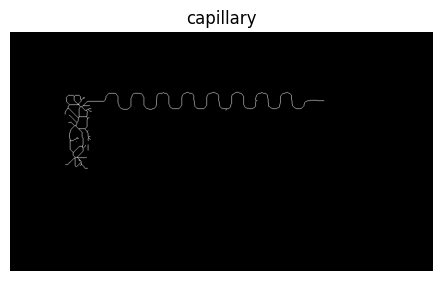

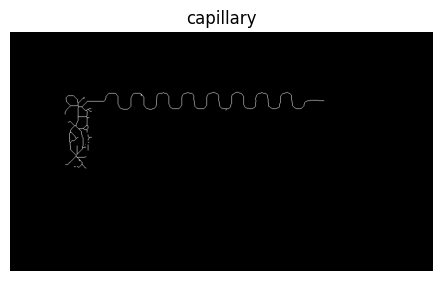

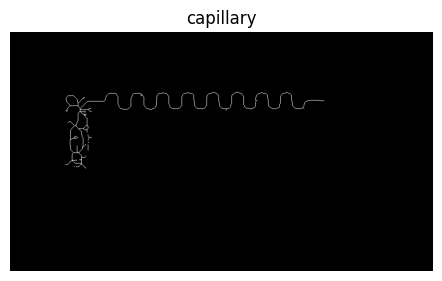

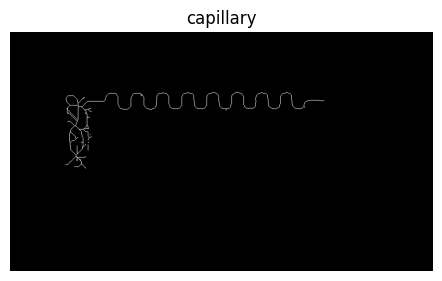

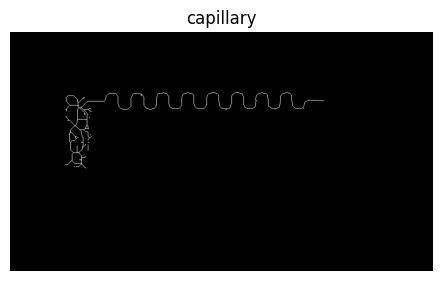

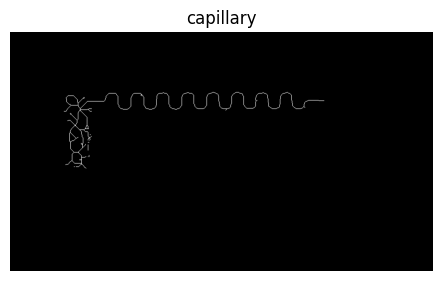

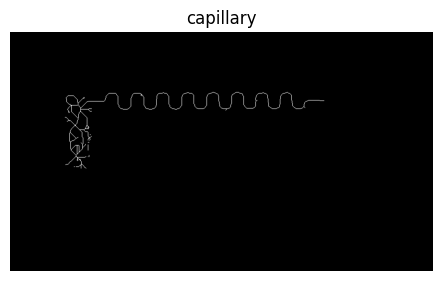

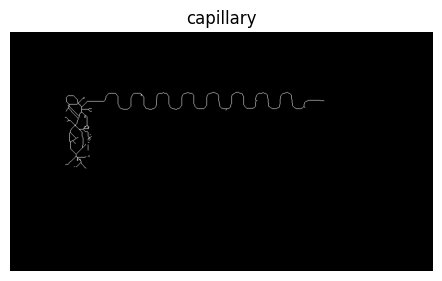

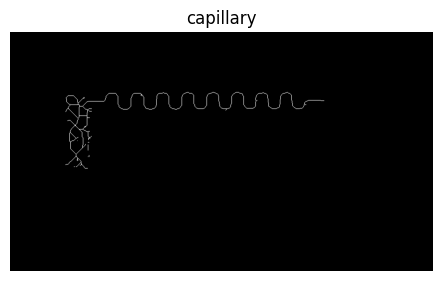

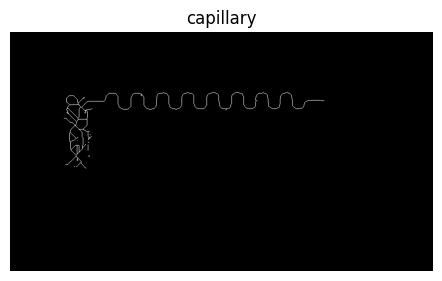

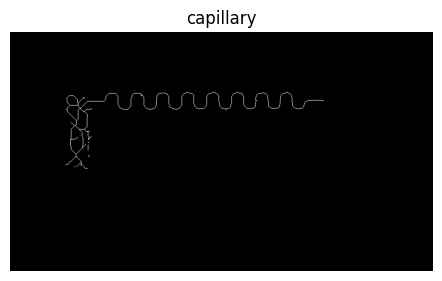

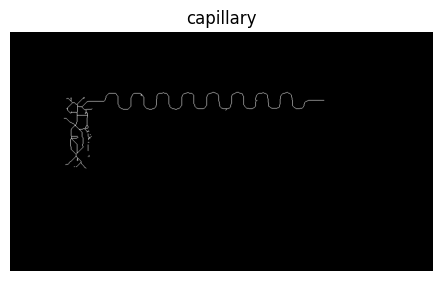

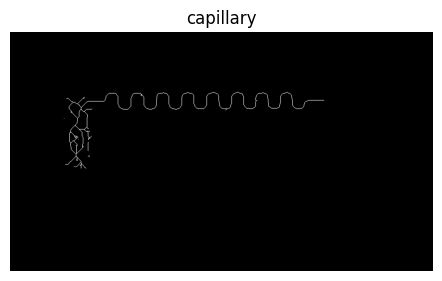

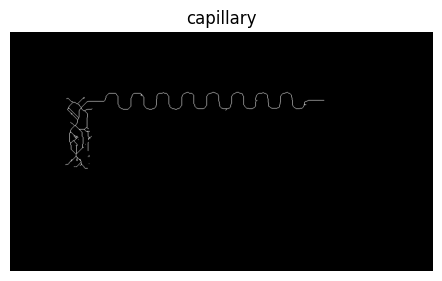

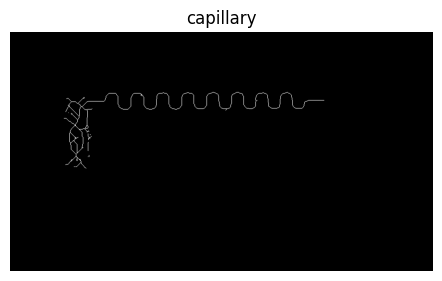

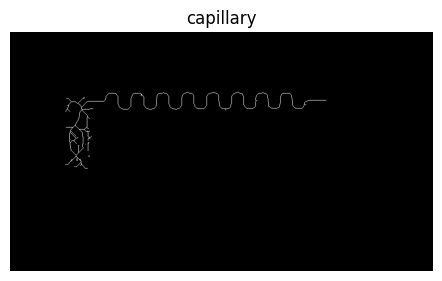

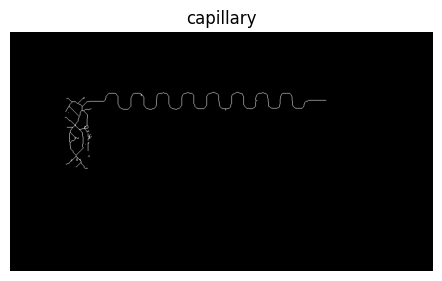

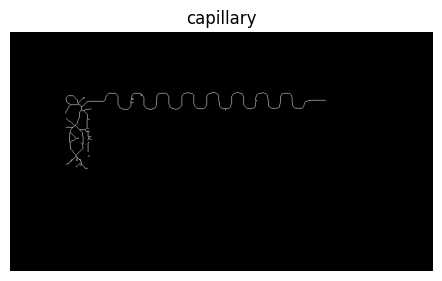

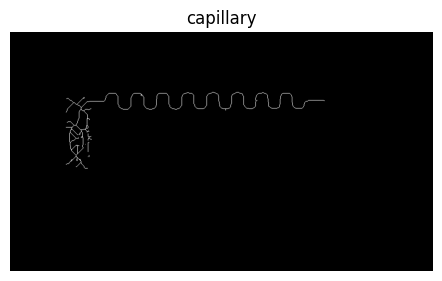

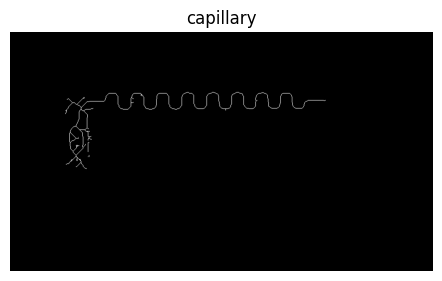

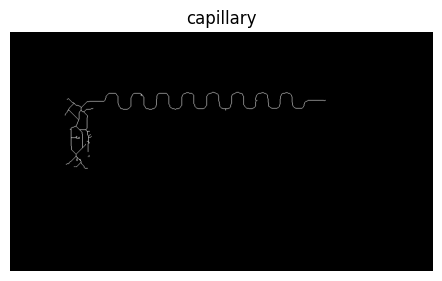

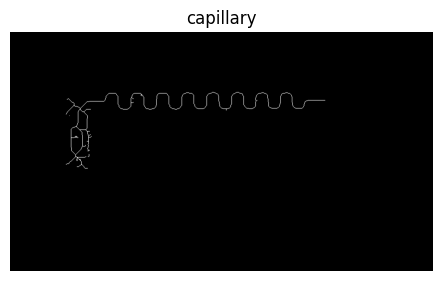

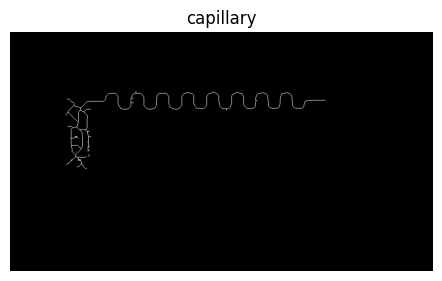

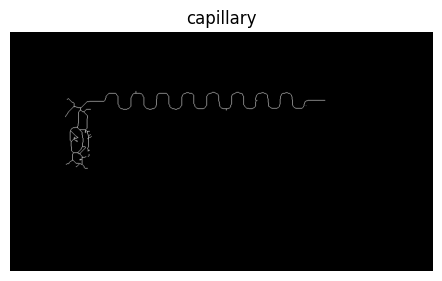

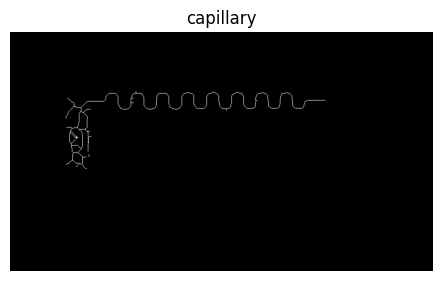

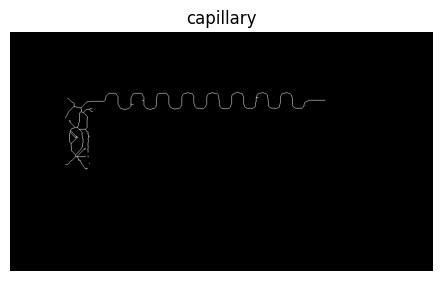

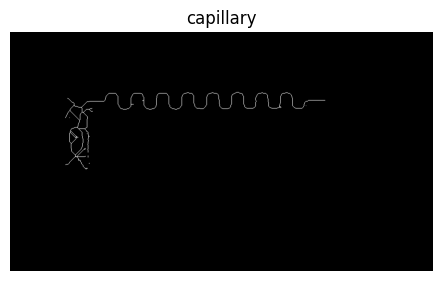

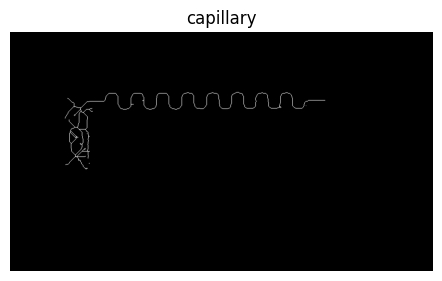

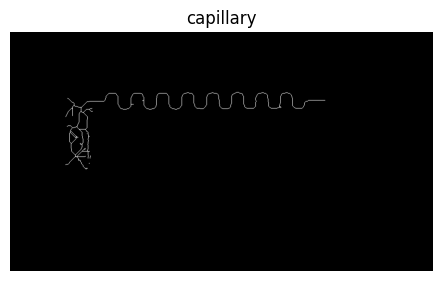

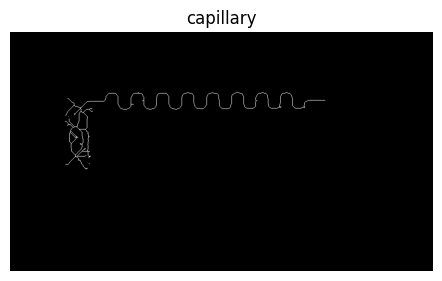

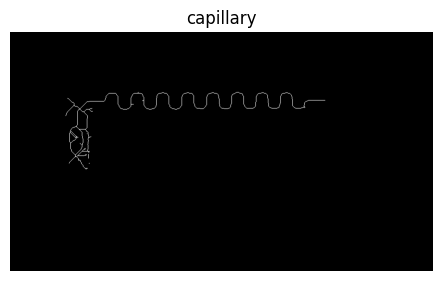

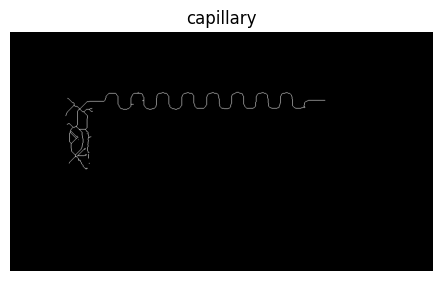

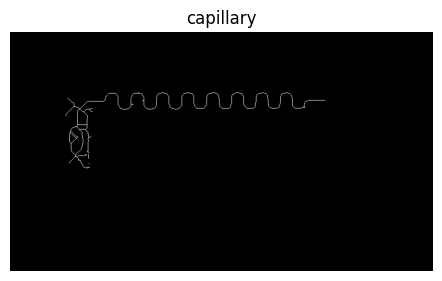

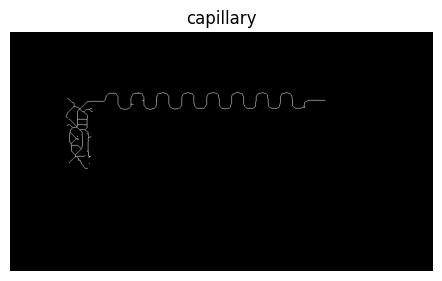

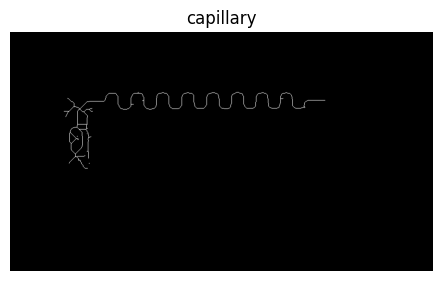

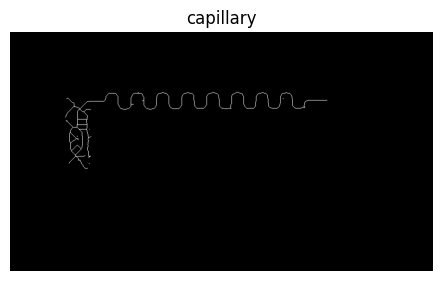

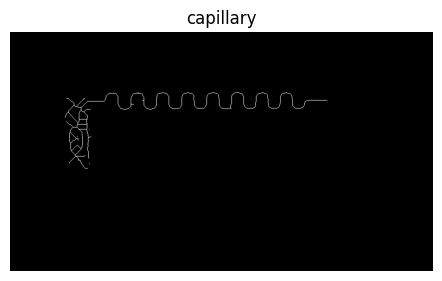

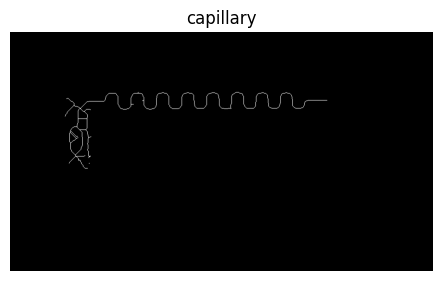

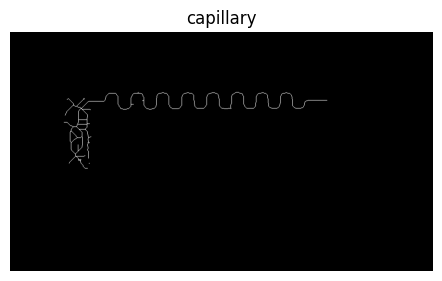

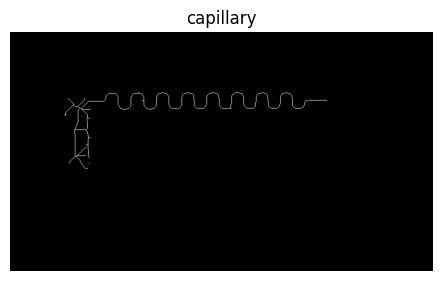

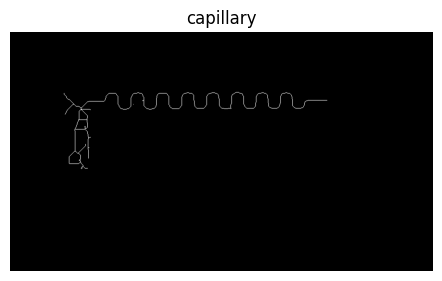

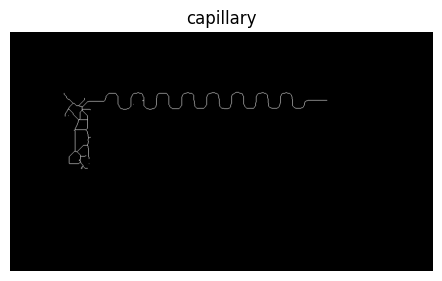

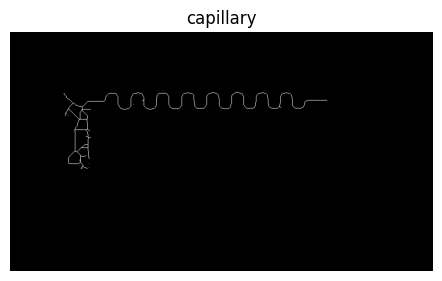

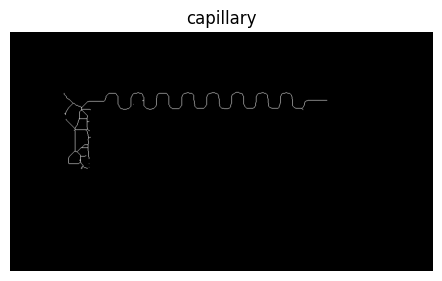

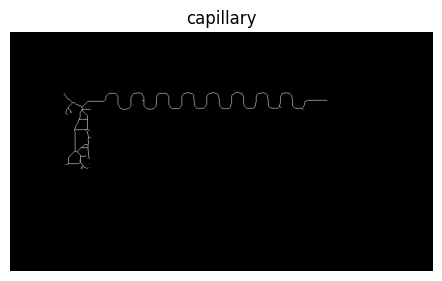

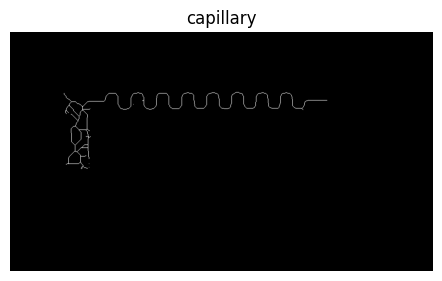

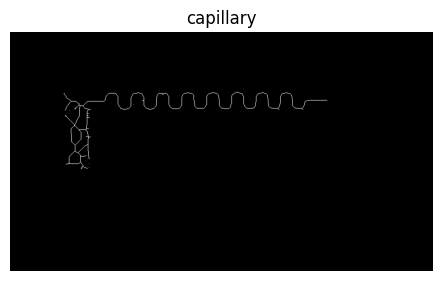

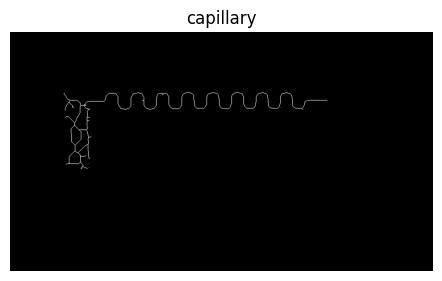

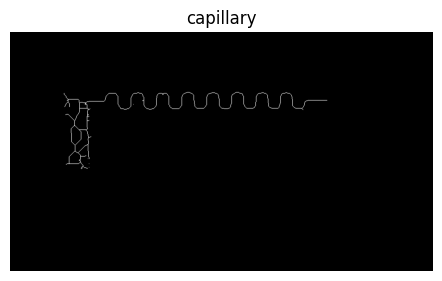

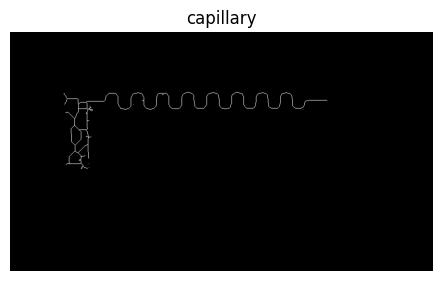

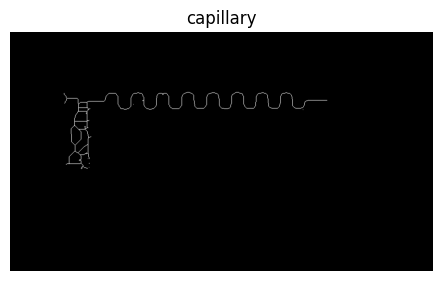

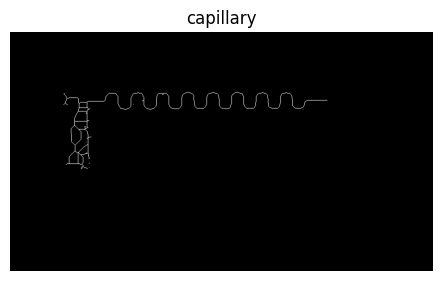

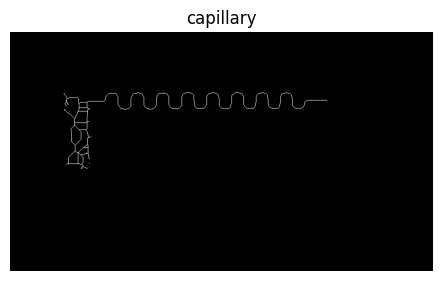

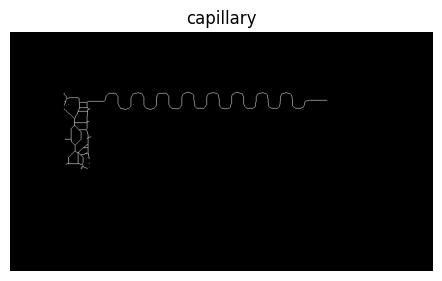

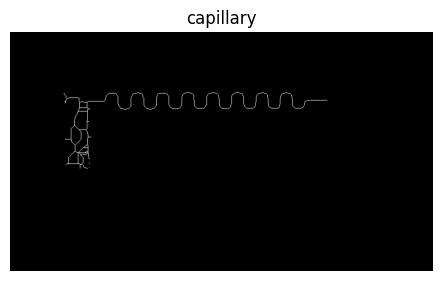

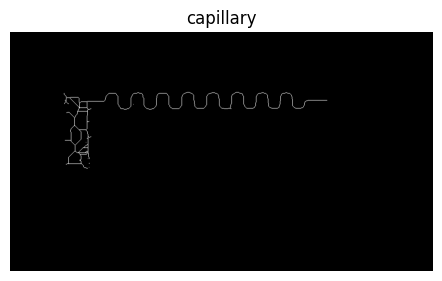

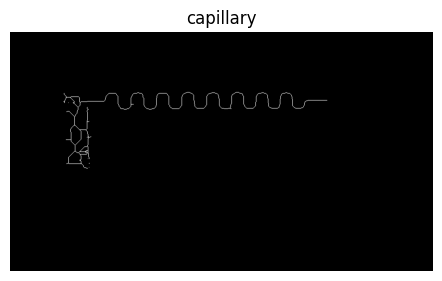

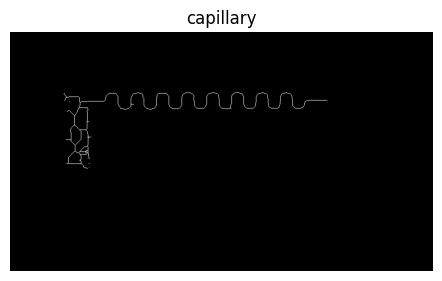

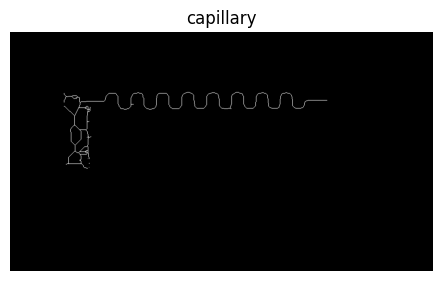

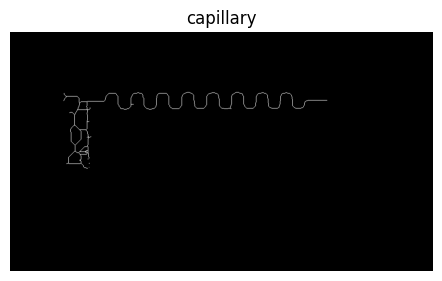

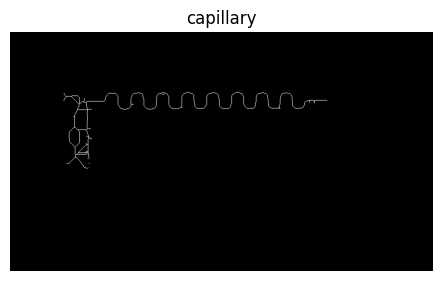

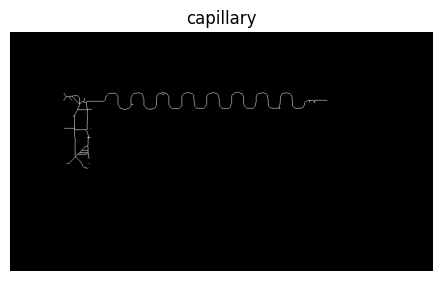

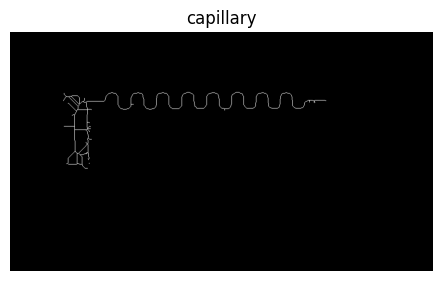

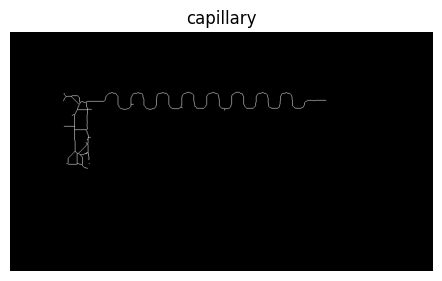

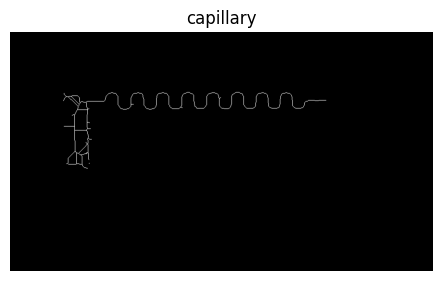

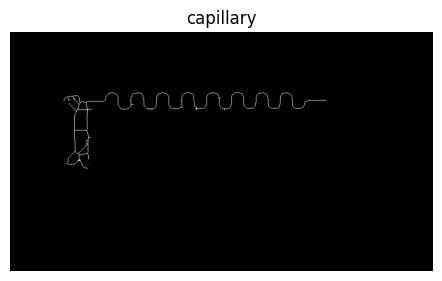

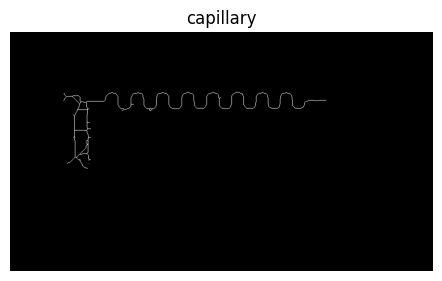

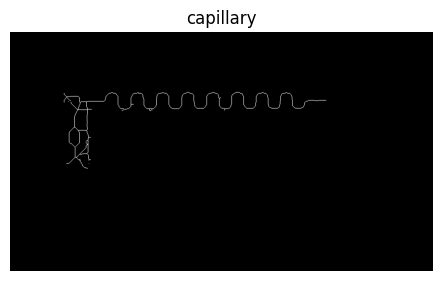

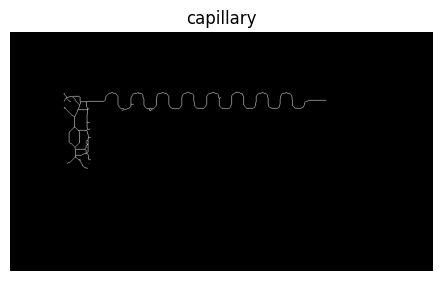

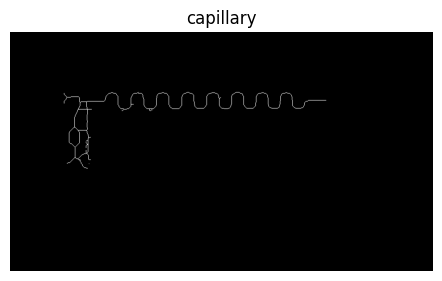

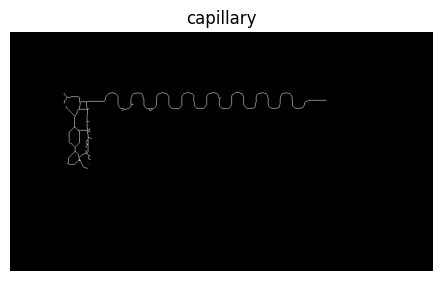

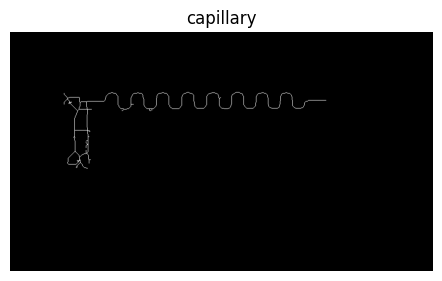

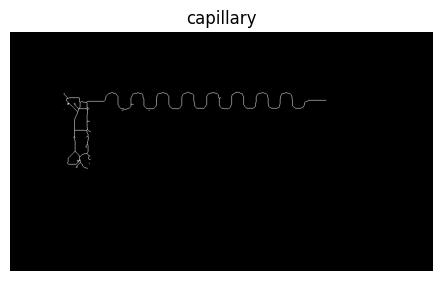

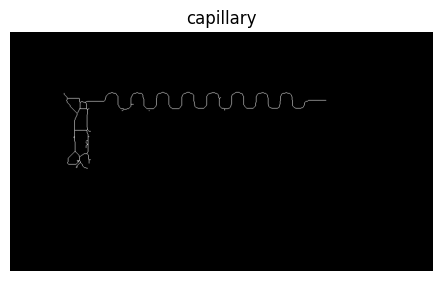

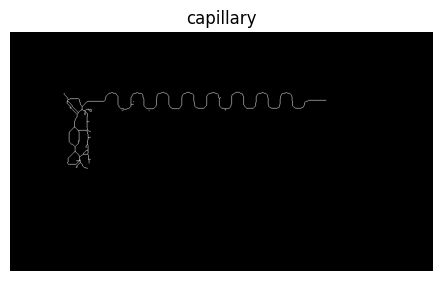

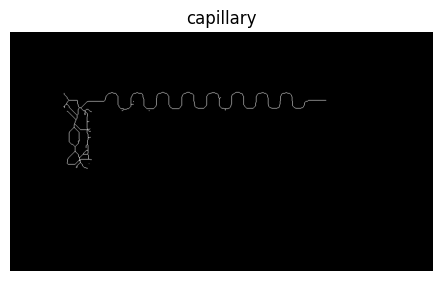

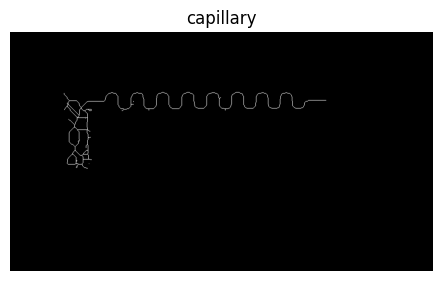

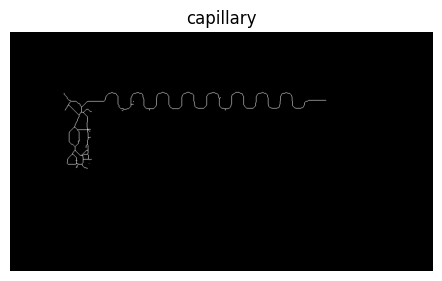

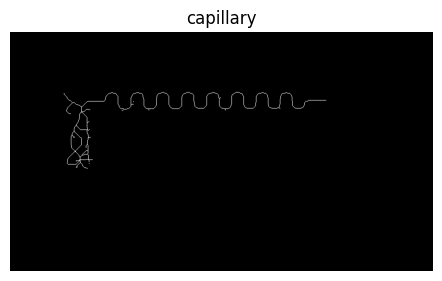

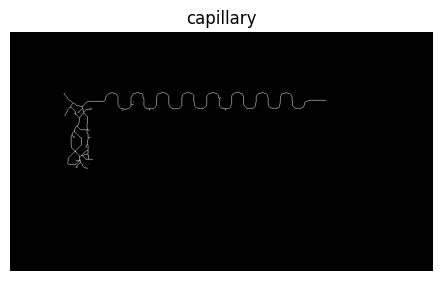

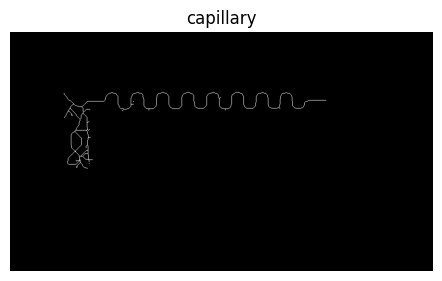

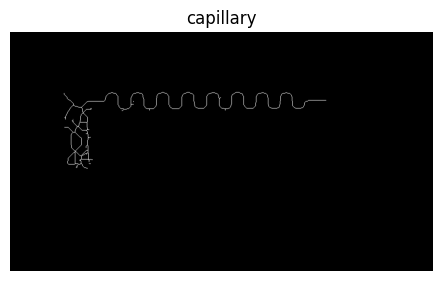

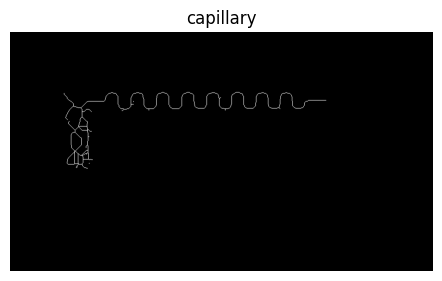

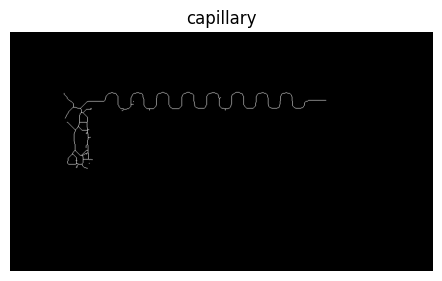

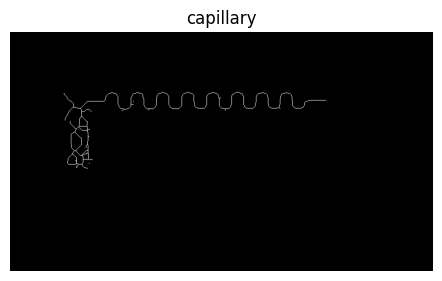

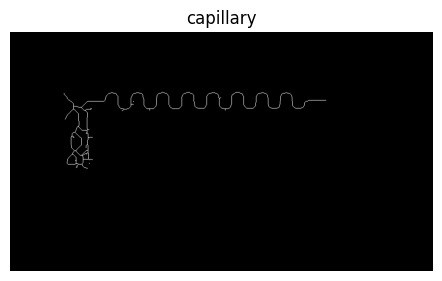

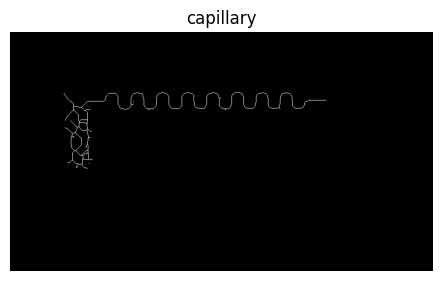

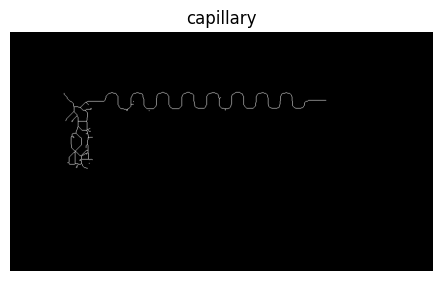

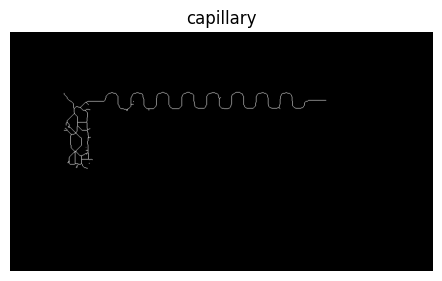

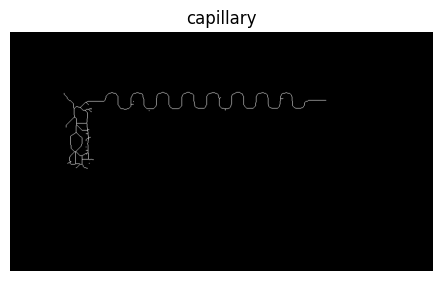

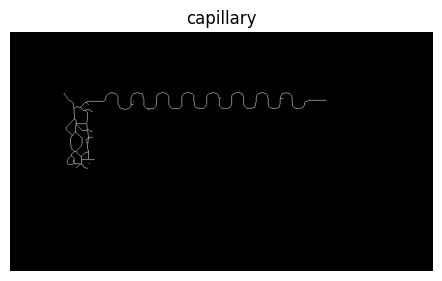

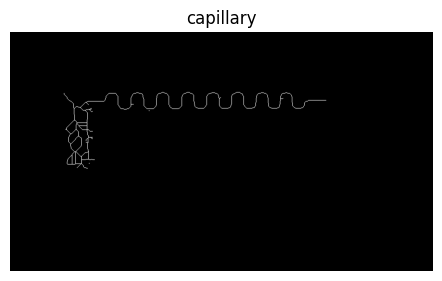

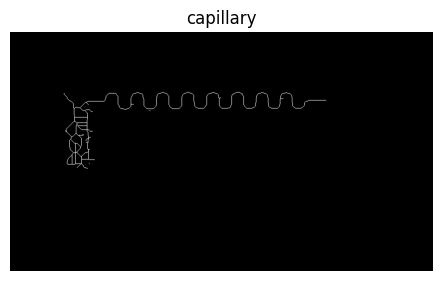

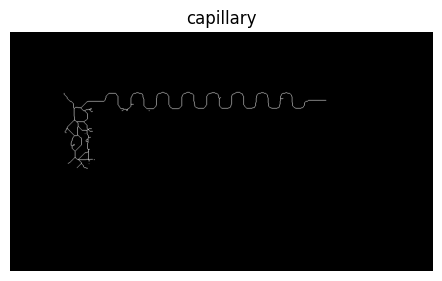

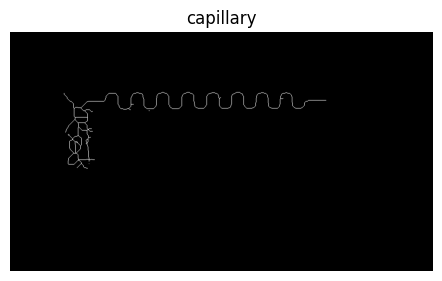

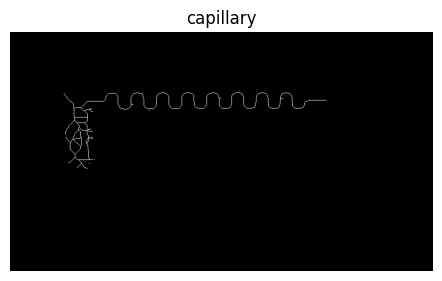

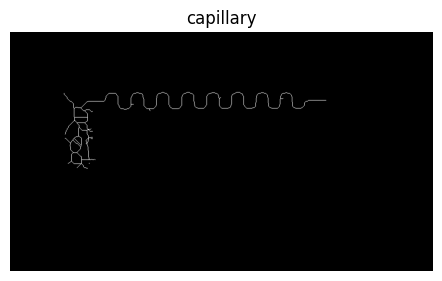

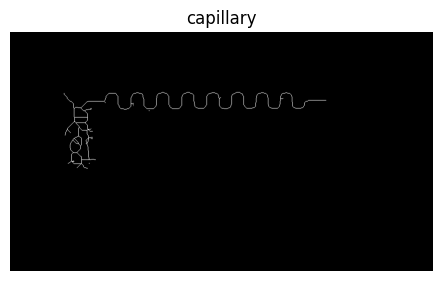

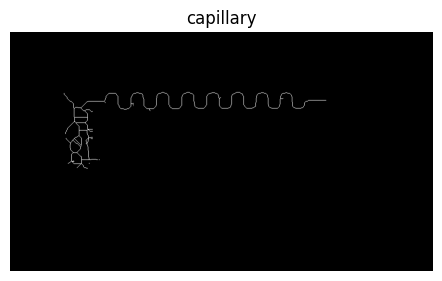

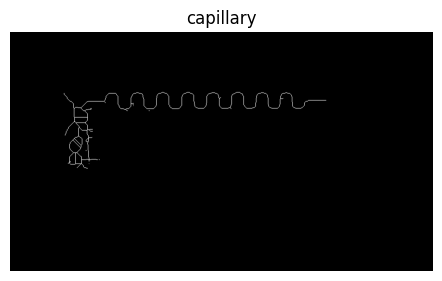

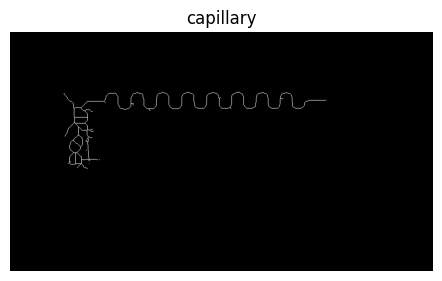

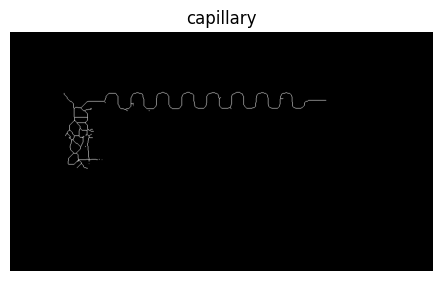

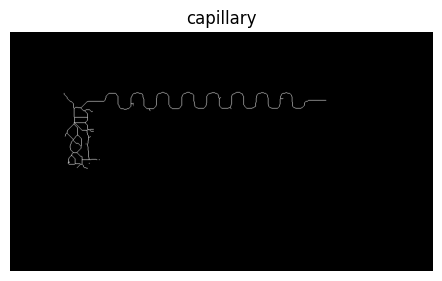

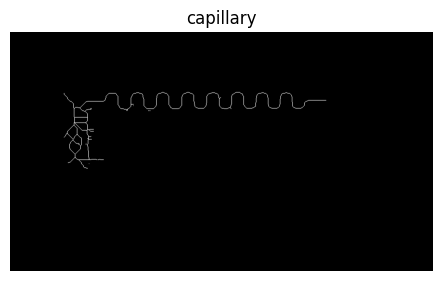

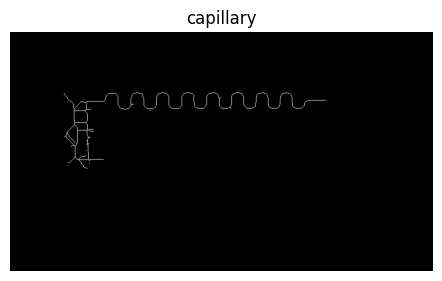

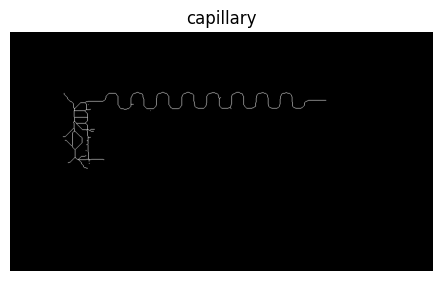

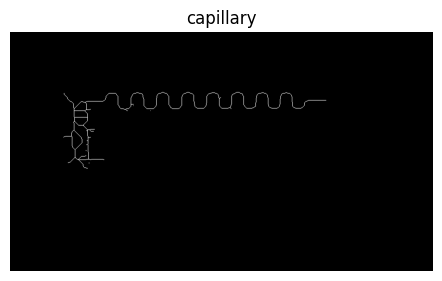

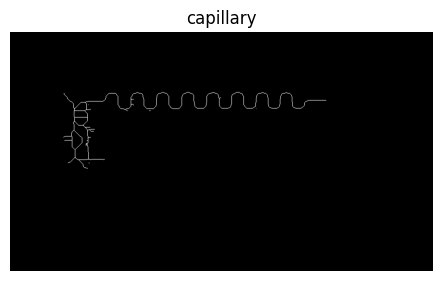

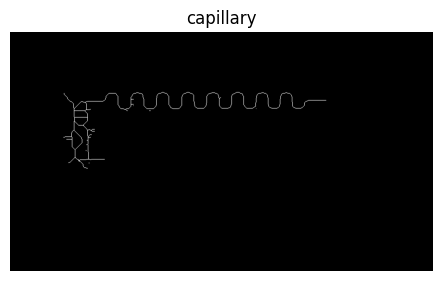

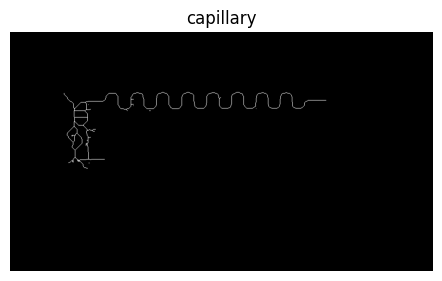

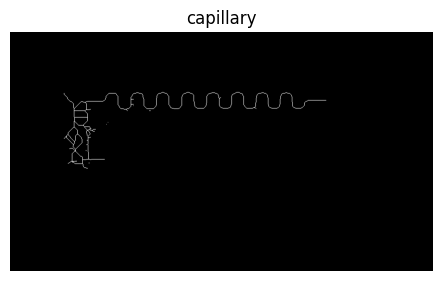

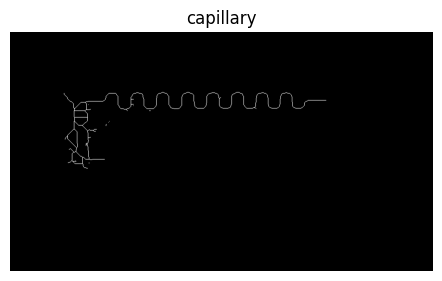

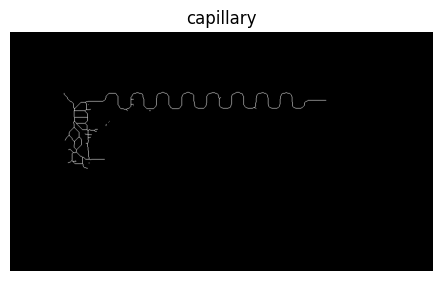

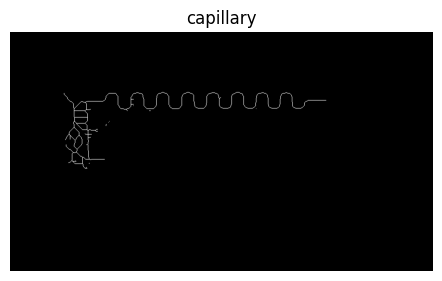

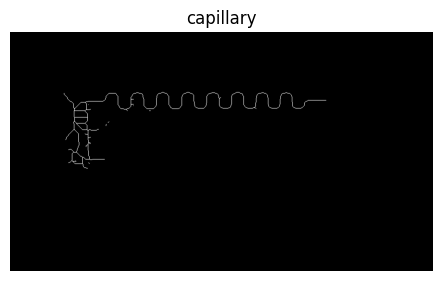

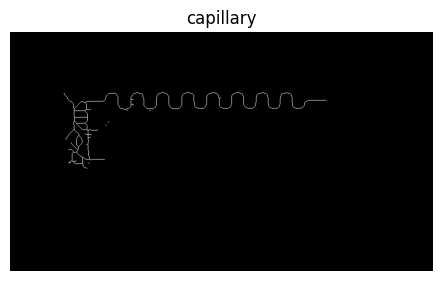

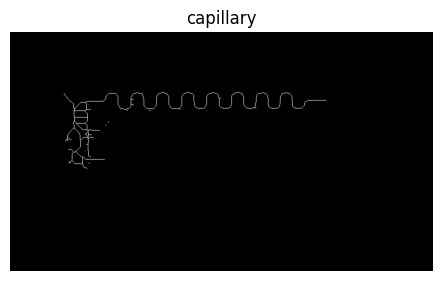

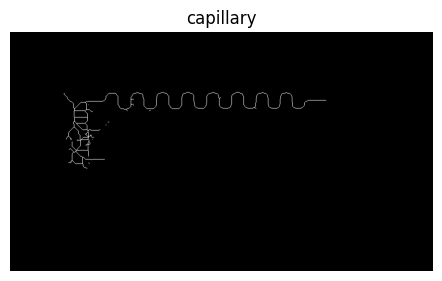

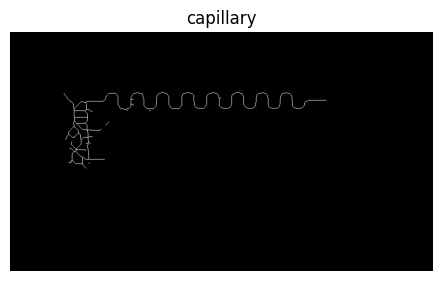

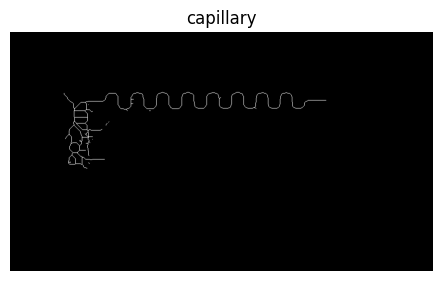

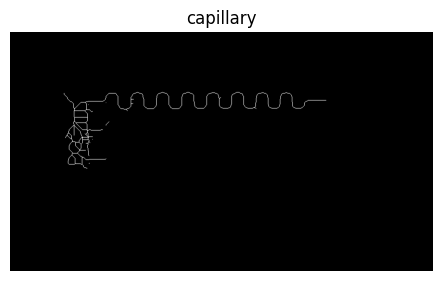

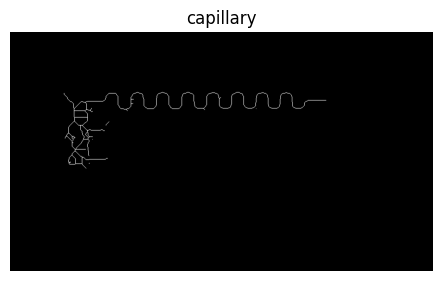

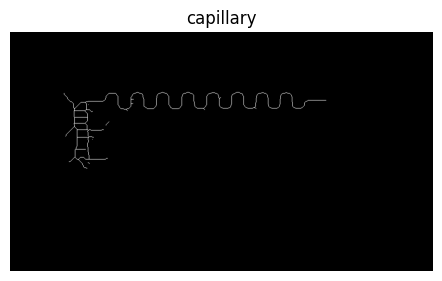

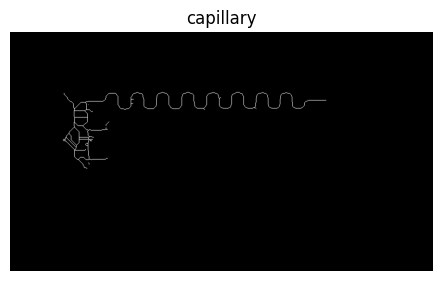

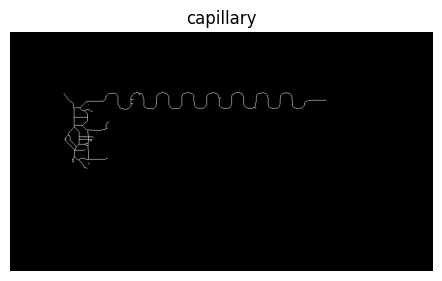

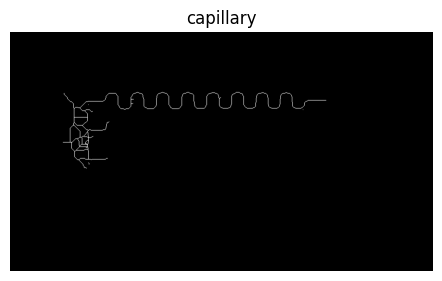

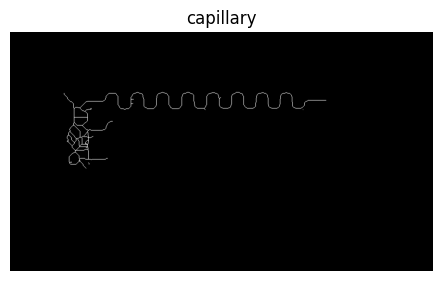

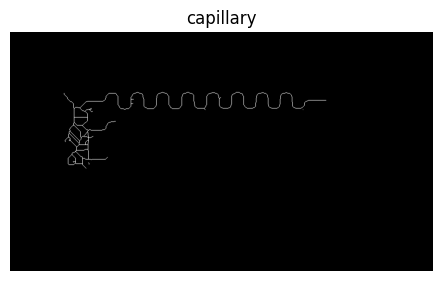

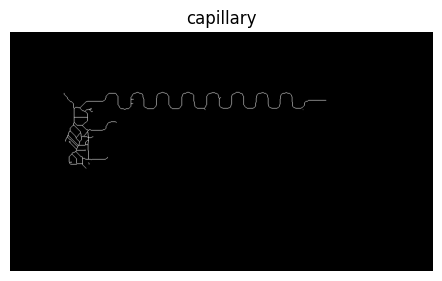

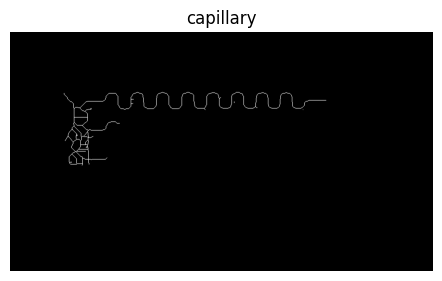

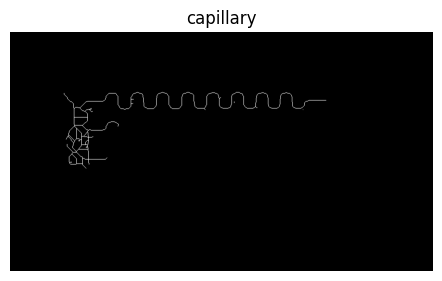

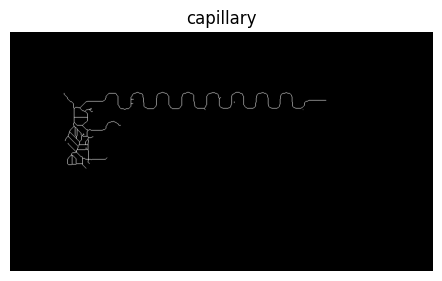

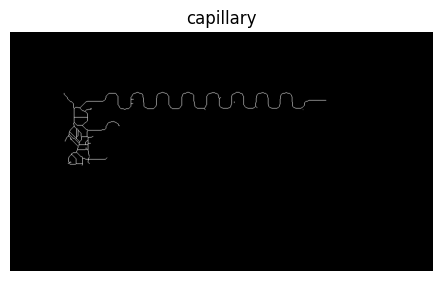

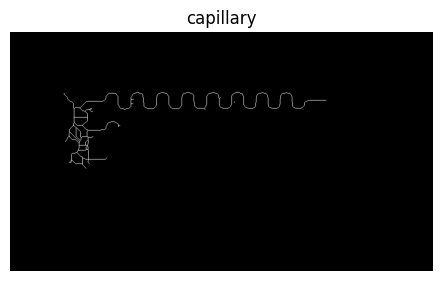

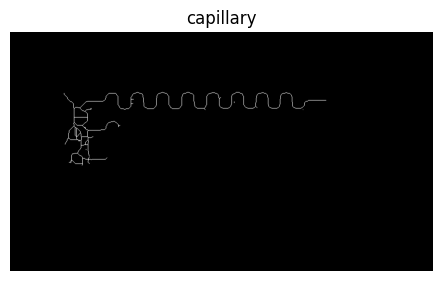

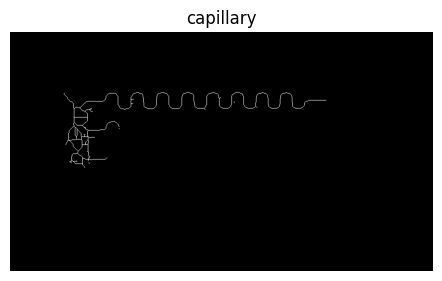

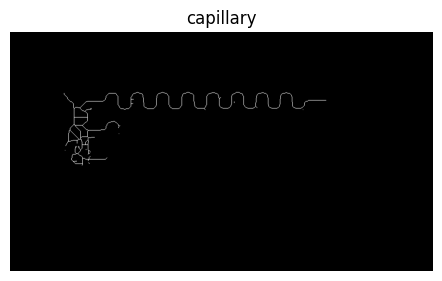

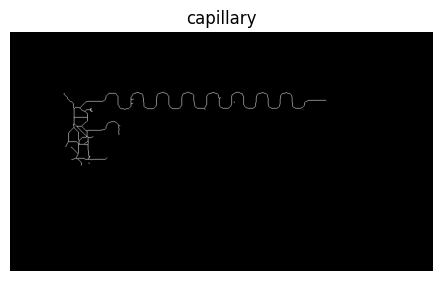

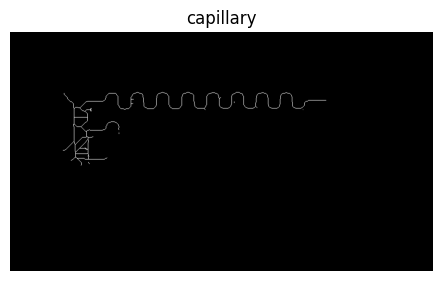

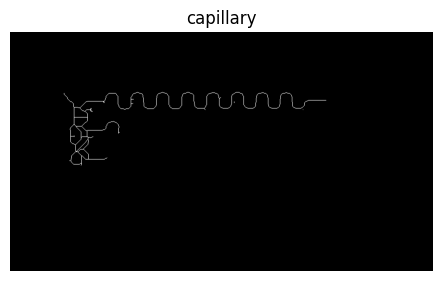

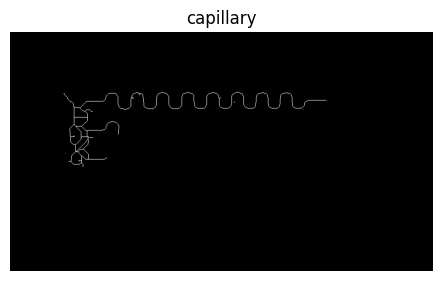

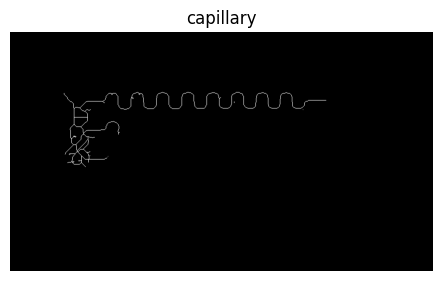

In [166]:
frames = 0

while True:
    ret, img = vid.read()

    if not ret or frames>=500:
        break

    
    red_img = channel_mix(img)
    
    _, binary_image = cv2.threshold(red_img, 100, 255, cv2.THRESH_BINARY)

    # Skeletonize the binary image
    skeleton = skeletonize(binary_image // 255).astype(np.uint8) * 255
    # display_image(skeleton)

    plt.figure(figsize=(12, 12))

    # Display the different stages as a 2x2 grid of images
    display_image(skeleton, "capillary", subplot=221)
    plt.show()
    length = cv2.countNonZero(skeleton)
    s.append(max(0,length-350))
    
    frames+=1

vid.release()

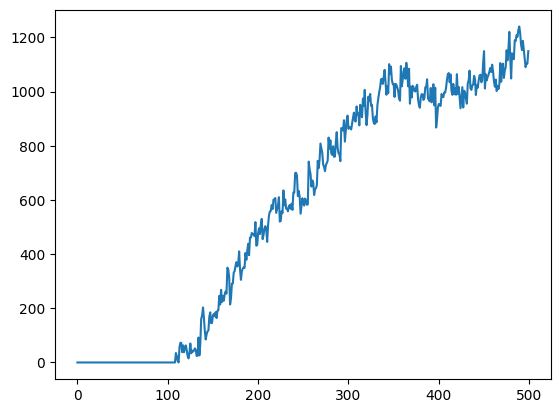

In [168]:
plt.plot(s)

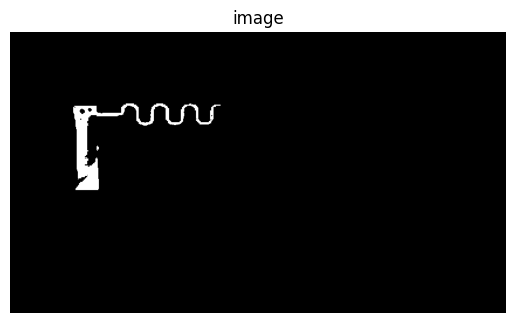

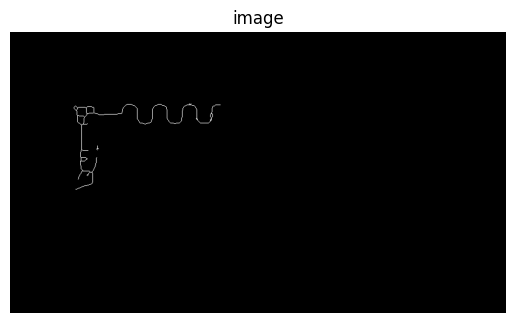

In [55]:
length = cv2.countNonZero(skeleton)
print(length)

736
